# PROJET ÉLECTIF - ANALYSE EXPLORATOIRE DE DONNÉES
## Groupe : Noé LORRET-DEPRET & Clément AUVRAY

# Projet Électif — Partie 1 : Statistiques Descriptives

**Objectif** : Calculer et interpréter les statistiques descriptives de l’ensemble de points bidimensionnels suivant :
- M1(1,1), M2(1,2), M3(1,5), M4(3,4), M5(4,3), M6(6,2), M7(0,4)

On étudie séparément les coordonnées `x` et `y` :
- Moyenne
- Médiane
- Variance
- Écart-type
- Min / Max
- Étendue

On visualisera également les données via un nuage de points.


In [1]:
from copy import deepcopy
from itertools import combinations
from math import sqrt, pi

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.stats import t
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score, pairwise_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Définition des points
points = {
    'M1': (1, 1),
    'M2': (1, 2),
    'M3': (1, 5),
    'M4': (3, 4),
    'M5': (4, 3),
    'M6': (6, 2),
    'M7': (0, 4)
}

# Conversion en DataFrame
df = pd.DataFrame(points.values(), columns=['x', 'y'], index=points.keys())
df

,x,y
M1,1,1
M2,1,2
M3,1,5
M4,3,4
M5,4,3
M6,6,2
M7,0,4


In [3]:
# Chargement des données
df_hd = pd.read_excel('data.xlsx')\
  .rename(columns={"Unnamed: 0": ""})\
  .dropna()

df_hd = df_hd.set_index(df_hd.columns[0])

# Normalisation
scaler = StandardScaler()
X_hd = scaler.fit_transform(df_hd)

individus = df_hd.index

Blabla

In [4]:
# Moyenne
mean_x = df['x'].mean()
mean_y = df['y'].mean()

In [5]:
# Médiane
median_x = df['x'].median()
median_y = df['y'].median()

In [6]:
# Variance
var_x = df['x'].var()
var_y = df['y'].var()

In [7]:
# Écart-type
std_x = df['x'].std()
std_y = df['y'].std()

In [8]:
# Min / Max
min_x, max_x = df['x'].min(), df['x'].max()
min_y, max_y = df['y'].min(), df['y'].max()

In [9]:
# Étendue
range_x = max_x - min_x
range_y = max_y - min_y

In [10]:
# Résumé dans un DataFrame
stats_df = pd.DataFrame({
    'x': [mean_x, median_x, var_x, std_x, min_x, max_x, range_x],
    'y': [mean_y, median_y, var_y, std_y, min_y, max_y, range_y]
}, index=['Moyenne', 'Médiane', 'Variance', 'Écart-type', 'Min', 'Max', 'Étendue'])

stats_df

,x,y
Moyenne,2.285714,3.000000
Médiane,1.000000,3.000000
Variance,4.571429,2.000000
Écart-type,2.138090,1.414214
Min,0.000000,1.000000
Max,6.000000,5.000000
Étendue,6.000000,4.000000


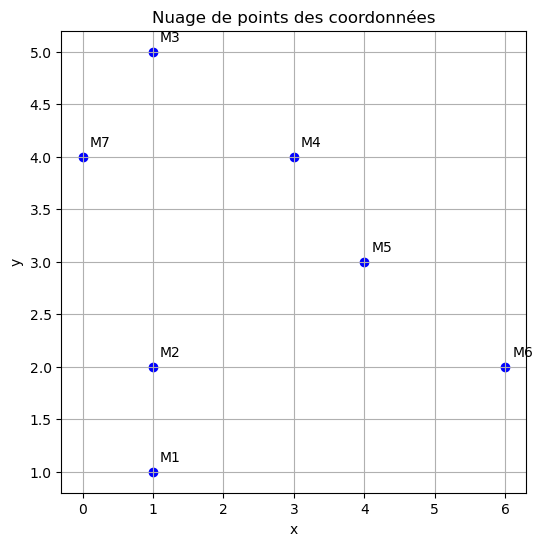

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], color='blue')

# Ajout des étiquettes
for name, (x, y) in points.items():
    plt.text(x + 0.1, y + 0.1, name)

plt.title("Nuage de points des coordonnées")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Interprétation

- **Répartition des coordonnées** :
  - En x : les valeurs vont de 0 à 6, donc une dispersion modérée.
  - En y : elles sont comprises entre 1 et 5.

- **Visualisation** :
  - On observe un regroupement des points dans une région assez étroite.
  - Il semble y avoir une légère tendance linéaire croissante entre x et y.

Cela justifie d’explorer une éventuelle relation linéaire à l’aide d’une régression dans la Partie 2.

# Partie 2 : Régression Linéaire Simple

**Objectif** : Explorer s’il existe une relation linéaire entre les coordonnées `x` (variable indépendante) et `y` (variable dépendante).

Nous allons :
- Calculer les coefficients de la droite de régression \( $\hat{y} = b_0 + b_1 x$ \)
- Tracer la droite de régression sur le nuage de points
- Calculer le coefficient de détermination \( $R^2$ \) pour évaluer la qualité de l'ajustement

In [12]:
# Extraire les données
x = df['x'].values
y = df['y'].values
n = len(x)

# Moyennes
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calcul de b1
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)
b1 = numerator / denominator

# Calcul de b0
b0 = mean_y - b1 * mean_x

print(f"Coefficient directeur (b1) : {b1:.4f}")
print(f"Ordonnée à l'origine (b0) : {b0:.4f}")

Coefficient directeur (b1) : -0.1458
Ordonnée à l'origine (b0) : 3.3333


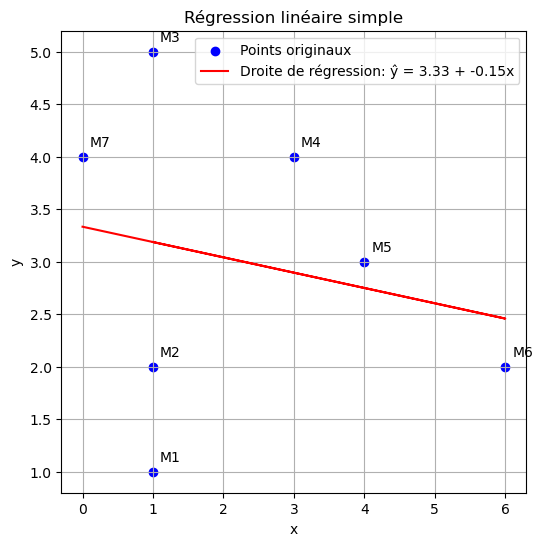

In [13]:
# Prédictions
y_hat = b0 + b1 * x

# Affichage
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', label='Points originaux')
plt.plot(x, y_hat, color='red', label=f'Droite de régression: ŷ = {b0:.2f} + {b1:.2f}x')

# Étiquettes
for name, (xi, yi) in points.items():
    plt.text(xi + 0.1, yi + 0.1, name)

plt.title("Régression linéaire simple")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# Somme des carrés totaux (SCT)
SCT = np.sum((y - mean_y) ** 2)
print(f"SCT = {SCT:.4f}")

SCT = 12.0000


In [15]:
# Somme des carrés des erreurs (SCE)
SCE = np.sum((y - y_hat) ** 2)
print(f"SCT = {SCE:.4f}")

SCT = 11.4167


In [16]:
# Somme des carrés de la régression (SCR)
SCR = np.sum((y_hat - mean_y) ** 2)
print(f"SCT = {SCR:.4f}")

SCT = 0.5833


In [17]:
# Coefficient de détermination
R2 = 1 - (SCE / SCT)
print(f"Coefficient de détermination R² : {R2:.4f}")

Coefficient de détermination R² : 0.0486


## Interprétation

- La droite obtenue permet d’approcher la tendance linéaire entre `x` et `y`.
- Le coefficient \( $b_1$ \) représente la pente : une augmentation de x d'une unité entraîne une augmentation moyenne de `b1` unités de y.
- Le coefficient \( $R^2$ \) indique quelle proportion de la variance de `y` est expliquée par `x`.

Si \( $R^2 \approx 1$ \), le modèle est bon. Si \( $R^2$ \) est faible, la droite ne reflète pas bien la réalité.

Nous continuerons l’analyse dans la Partie 3 avec une étude des erreurs et la robustesse du modèle.


# Partie 3 : Estimation de l'erreur en Régression Linéaire Simple

**Objectif** : Étudier la qualité de l’ajustement du modèle par le calcul :
- des résidus
- de la somme des carrés des erreurs (SCE)
- de la variance estimée (MSE)
- de l’écart-type des erreurs

Cela permet de quantifier l’erreur aléatoire entre les observations réelles et celles prévues par le modèle.

In [18]:
# Résidus : écart entre les valeurs observées et les valeurs prédites
residus = y - y_hat

# Somme des carrés des erreurs
SCE = np.sum(residus**2)

print(f"Résidus : {residus}")
print(f"Somme des carrés des erreurs (SCE) : {SCE:.4f}")

Résidus : [-2.1875     -1.1875      1.8125      1.10416667  0.25       -0.45833333
  0.66666667]
Somme des carrés des erreurs (SCE) : 11.4167


In [19]:
# MSE : estimation de la variance des erreurs (degrés de liberté = n - 2)
MSE = SCE / (n - 2)

# Écart-type des erreurs
std_error = np.sqrt(MSE)

print(f"Variance estimée des erreurs (MSE) : {MSE:.4f}")
print(f"Écart-type des erreurs : {std_error:.4f}")

Variance estimée des erreurs (MSE) : 2.2833
Écart-type des erreurs : 1.5111


## Interprétation

- Les **résidus** montrent les écarts individuels entre les observations et la droite ajustée.
- La **SCE** mesure l’erreur globale : plus elle est petite, plus le modèle colle aux données.
- Le **MSE** est une estimation non biaisée de la variance des erreurs.
- L’**écart-type des erreurs** donne une idée de la dispersion moyenne autour de la droite.

Ces mesures sont essentielles pour juger la fiabilité du modèle, et seront utilisées dans la suite pour effectuer des **tests statistiques** sur les coefficients.


# Partie 4 : Régression Linéaire Simple avec Tests Statistiques

**Objectif** : Tester si la relation entre `x` et `y` est statistiquement significative.

Nous allons :
- Calculer les erreurs standards des coefficients
- Effectuer des tests d’hypothèses (H₀ : b = 0) sur b₀ et b₁
- Construire des intervalles de confiance à 95%
- Interpréter les résultats via les **valeurs de t** et les **p-valeurs**


In [20]:
# Erreur standard de b1 (pente)
SE_b1 = std_error / np.sqrt(np.sum((x - mean_x)**2))

# Erreur standard de b0 (ordonnée à l’origine)
SE_b0 = std_error * np.sqrt(1/n + (mean_x**2) / np.sum((x - mean_x)**2))

print(f"Erreur standard de b1 : {SE_b1:.4f}")
print(f"Erreur standard de b0 : {SE_b0:.4f}")

Erreur standard de b1 : 0.2885
Erreur standard de b0 : 0.8724


In [21]:
# Test t pour b1
t_b1 = b1 / SE_b1

# Test t pour b0
t_b0 = b0 / SE_b0

# Degrés de liberté
ddl = n - 2

# Valeur critique à 95%
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=ddl)

print(f"t statistique pour b1 : {t_b1:.4f}")
print(f"t statistique pour b0 : {t_b0:.4f}")
print(f"Valeur critique t (alpha=0.05, ddl={ddl}) : {t_crit:.4f}")

t statistique pour b1 : -0.5054
t statistique pour b0 : 3.8208
Valeur critique t (alpha=0.05, ddl=5) : 2.5706


In [22]:
# p-valeurs associées aux t-statistiques (bilatéral)
p_b1 = 2 * (1 - t.cdf(abs(t_b1), df=ddl))
p_b0 = 2 * (1 - t.cdf(abs(t_b0), df=ddl))

print(f"p-valeur pour b1 : {p_b1:.4f}")
print(f"p-valeur pour b0 : {p_b0:.4f}")

p-valeur pour b1 : 0.6347
p-valeur pour b0 : 0.0124


In [23]:
# Intervalle de confiance pour b1
IC_b1 = (b1 - t_crit * SE_b1, b1 + t_crit * SE_b1)

# Intervalle de confiance pour b0
IC_b0 = (b0 - t_crit * SE_b0, b0 + t_crit * SE_b0)

print(f"Intervalle de confiance à 95% pour b1 : {[round(float(a), 4) for a in IC_b1]}")
print(f"Intervalle de confiance à 95% pour b0 : {[round(float(a), 4) for a in IC_b0]}")

Intervalle de confiance à 95% pour b1 : [-0.8875, 0.5958]
Intervalle de confiance à 95% pour b0 : [1.0907, 5.576]


## Interprétation des Tests

- **Hypothèses testées** :
  - H₀ : b₁ = 0 (pas de relation linéaire)
  - H₁ : b₁ ≠ 0 (relation significative)

- Si la **p-valeur < 0.05**, on rejette H₀ : le coefficient est significatif.
- Si **0 ∉ intervalle de confiance**, cela confirme également la significativité.

Dans ce cas :
- Si p-valeur(b₁) est faible et l’intervalle ne contient pas 0, alors la pente est significative : il existe bien une relation linéaire entre x et y.
- L’analyse sera complétée par la **CAH** dans la partie suivante.

# Partie 5 : Classification Ascendante Hiérarchique (CAH)

**Objectifs** :
- Comprendre l’algorithme de la CAH par fusion des points les plus proches
- Implémenter différentes fonctions de distance
- Appliquer la CAH à un jeu de données simple
- Visualiser le regroupement avec un **dendrogramme**

Nous utiliserons d’abord la distance **euclidienne**, puis comparerons avec d’autres distances.


In [24]:
def dist_euclidienne(p1, p2):
    '''Blabla'''
    return sqrt((p1['x'] - p2['x'])**2 + (p1['y'] - p2['y'])**2)

In [25]:
def dist_manhattan(p1, p2):
    '''Blabla'''
    return abs(p1['x'] - p2['x']) + abs(p1['y'] - p2['y'])

In [26]:
def dist_infinie(p1, p2):
    '''Blabla'''
    return max(abs(p1['x'] - p2['x']), abs(p1['y'] - p2['y']))

In [27]:
def dist_group(g1, g2, clusters, df, dist_func):
    '''Distance minimale entre groupes'''
    return min(dist_func(df.loc[p1], df.loc[p2]) for p1 in clusters[g1] for p2 in clusters[g2])

In [28]:
def cah_steps(df, dist_func):
    '''Fonction de clustering hiérarchique pour une distance donnée'''
    clusters = {label: [label] for label in df.index}
    steps = []

    while len(clusters) > 1:
        keys = list(clusters.keys())
        combi = np.dstack(np.triu_indices(len(keys), k=1))[0]

        combi_dist = [
            dist_group(keys[i], keys[j], clusters, df, dist_func)
            for i,j in combi
        ]

        i, j = combi[np.argmin(combi_dist)]
        closest_pair = (keys[i], keys[j])

        new_label = f"{closest_pair[0]}+{closest_pair[1]}"
        clusters[new_label] = clusters[closest_pair[0]] + clusters[closest_pair[1]]
        clusters.pop(closest_pair[0])
        clusters.pop(closest_pair[1])

        steps.append((deepcopy(clusters), closest_pair))

    return steps

In [29]:
def plot_cah_step(ax, df, clusters, title):
    '''Fonction d'affichage côte à côte'''
    
    colors = plt.get_cmap('tab10')
    
    for i, (name, members) in enumerate(clusters.items()):
        c = colors(i % colors.N)
        x = [df.loc[m, 'x'] for m in members]
        y = [df.loc[m, 'y'] for m in members]

        ax.scatter(x, y, s=100, color=c, label=name)
        for m in members:
            ax.text(df.loc[m, 'x'] + 0.1, df.loc[m, 'y'] + 0.1, m, fontsize=8)
        for i1 in range(len(members)):
            for i2 in range(i1+1, len(members)):
                p1 = df.loc[members[i1]]
                p2 = df.loc[members[i2]]
                ax.plot([p1['x'], p2['x']], [p1['y'], p2['y']], color=c)

    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend(fontsize=6)

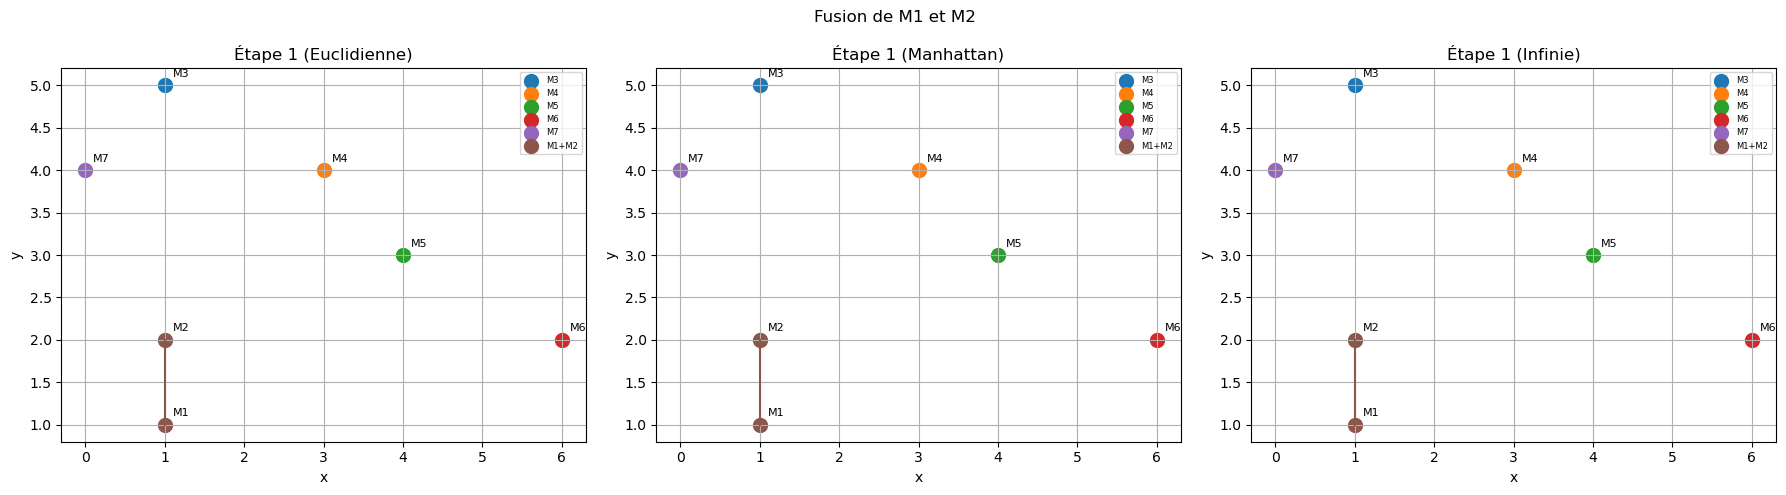

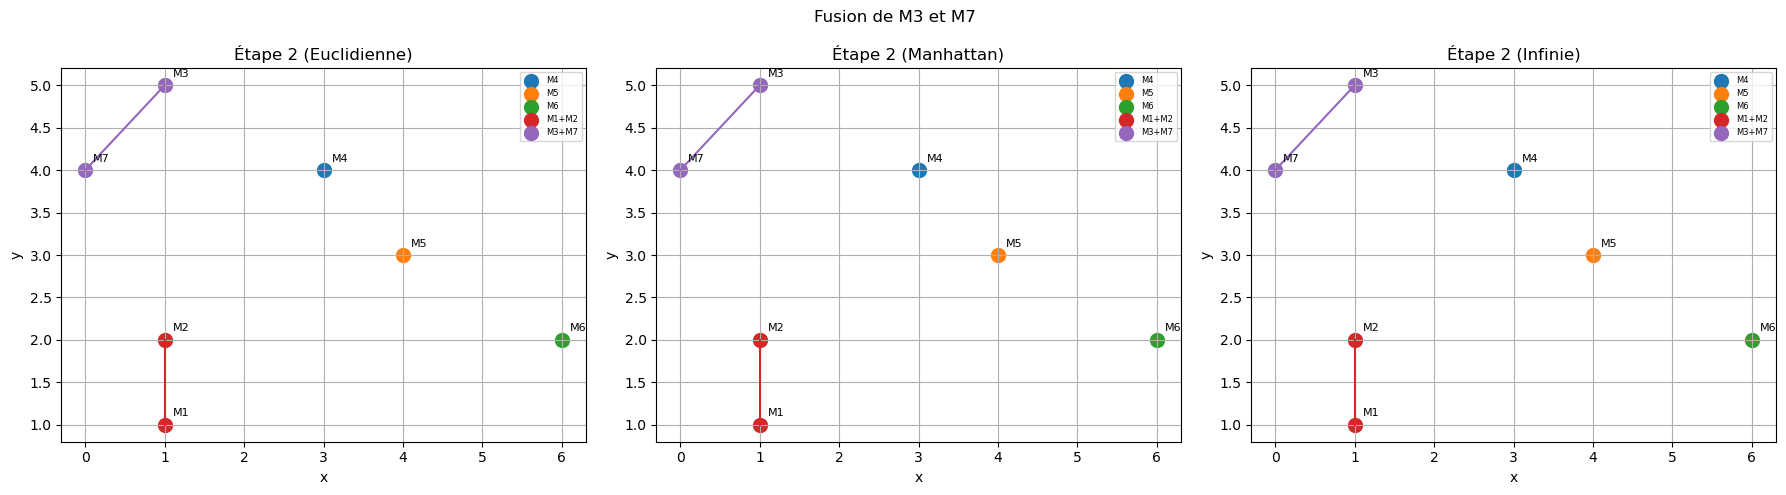

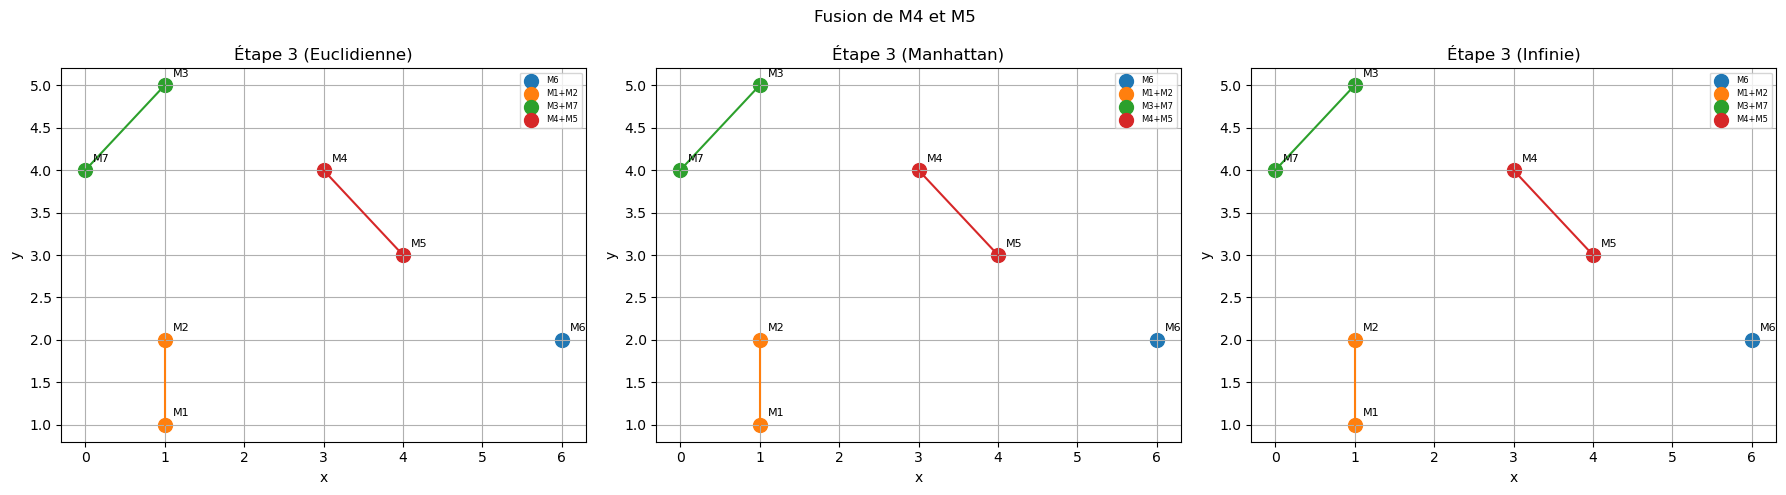

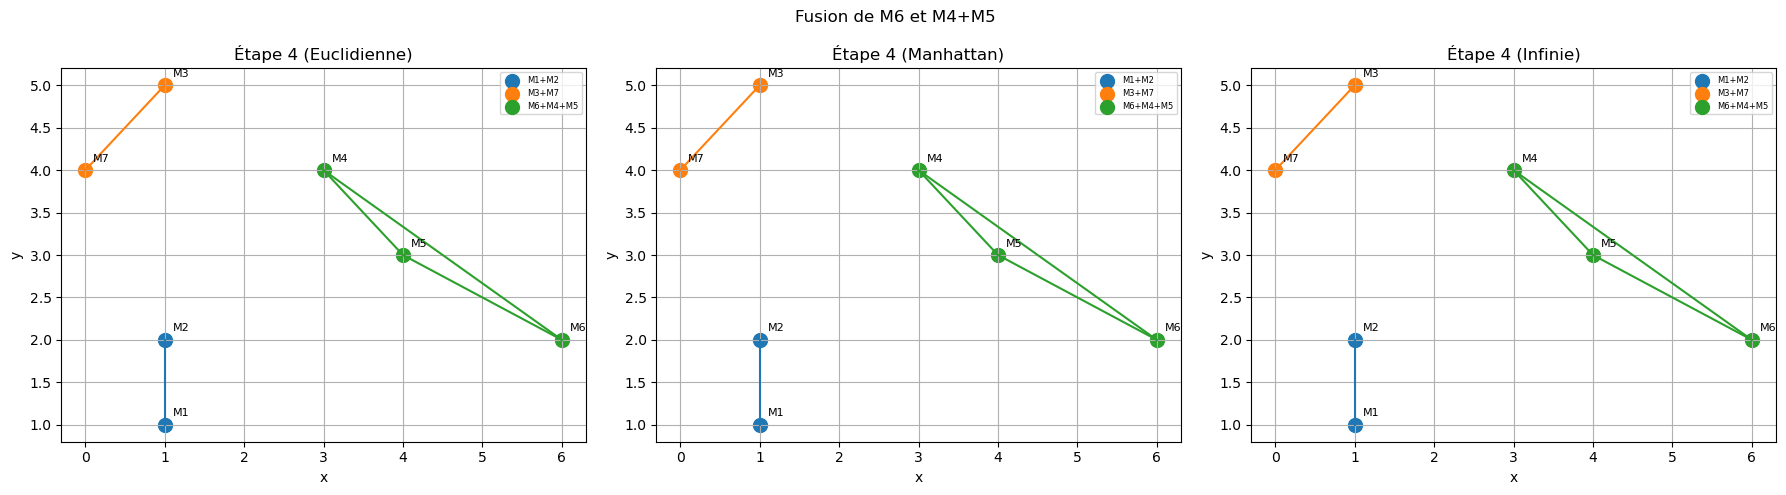

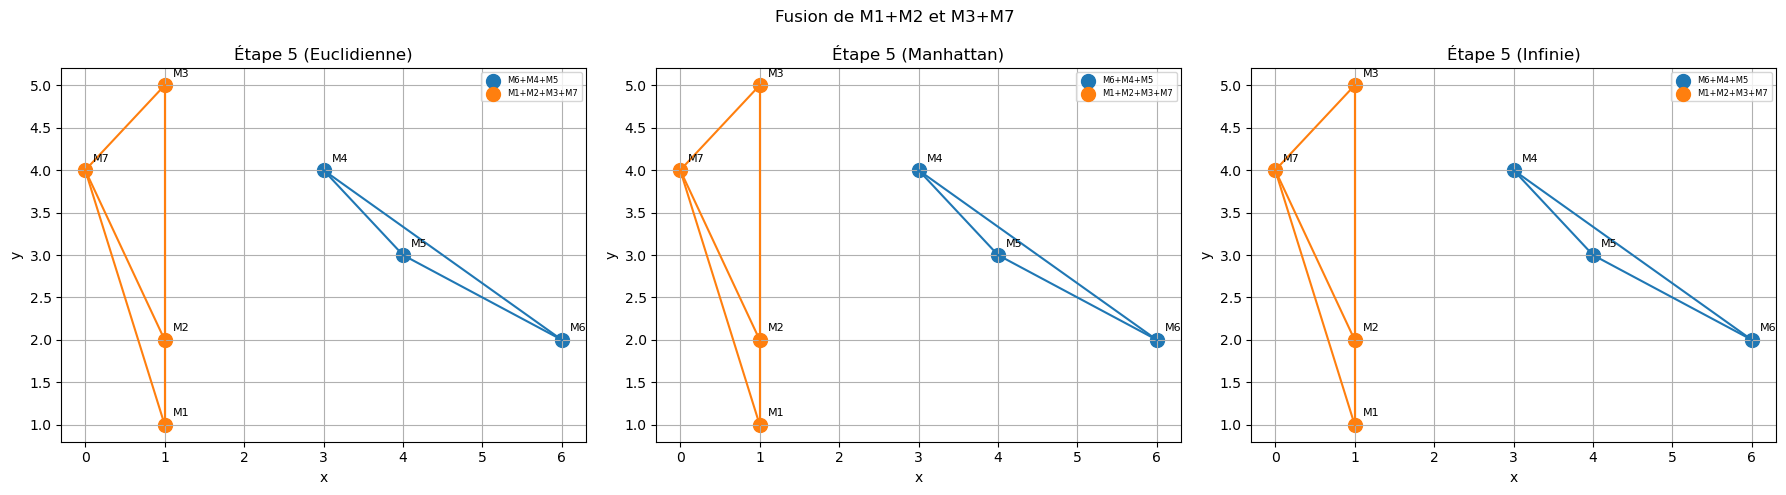

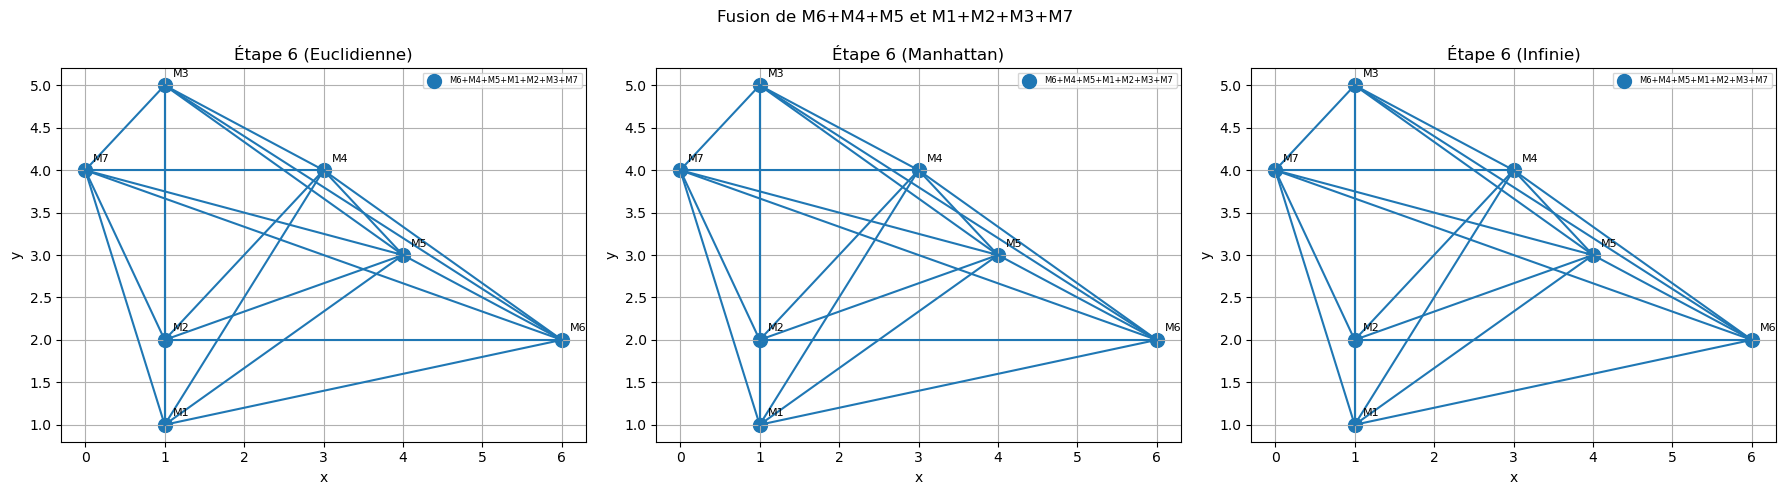

In [30]:
# Calcul des étapes pour chaque distance
steps_eucl = cah_steps(df, dist_euclidienne)
steps_manh = cah_steps(df, dist_manhattan)
steps_inf = cah_steps(df, dist_infinie)

# Nombre d'étapes (identique pour les trois méthodes)
n_steps = len(steps_eucl)

for step in range(n_steps):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    clusters_e, (a, b) = steps_eucl[step]
    clusters_m, _ = steps_manh[step]
    clusters_i, _ = steps_inf[step]
    
    plot_cah_step(axs[0], df, clusters_e, f"Étape {step+1} (Euclidienne)")
    plot_cah_step(axs[1], df, clusters_m, f"Étape {step+1} (Manhattan)")
    plot_cah_step(axs[2], df, clusters_i, f"Étape {step+1} (Infinie)")

    fig.suptitle(f"Fusion de {a} et {b}")
    plt.tight_layout()
    plt.show()

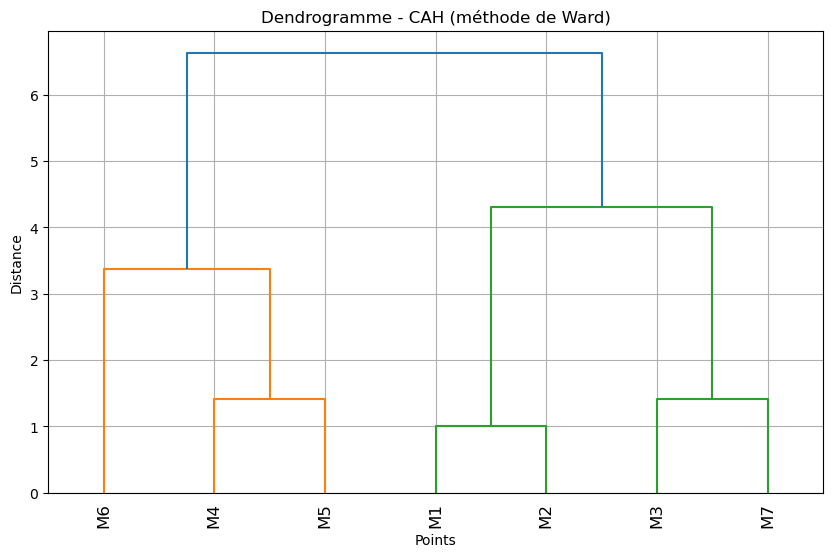

In [31]:
# CAH avec linkage (par défaut : euclidienne + méthode ward)
Z = linkage(df.values, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=list(points.keys()), leaf_rotation=90)
plt.title("Dendrogramme - CAH (méthode de Ward)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

## Interprétation

- Le dendrogramme montre l’ordre de regroupement des points.
- Plus une liaison est haute, plus la **distance entre les groupes est grande**.
- On peut couper le dendrogramme à une hauteur donnée pour choisir le nombre de **clusters**.
- Exemple : en coupant le trait à hauteur 4, on obtient 3 groupes.

À cette étape, nous avons utilisé l’agglomération par la méthode de Ward. On peut explorer d’autres méthodes ou distances dans des variantes.

Nous continuerons cette analyse avec la **validation du clustering** dans la partie suivante.


### Question 8

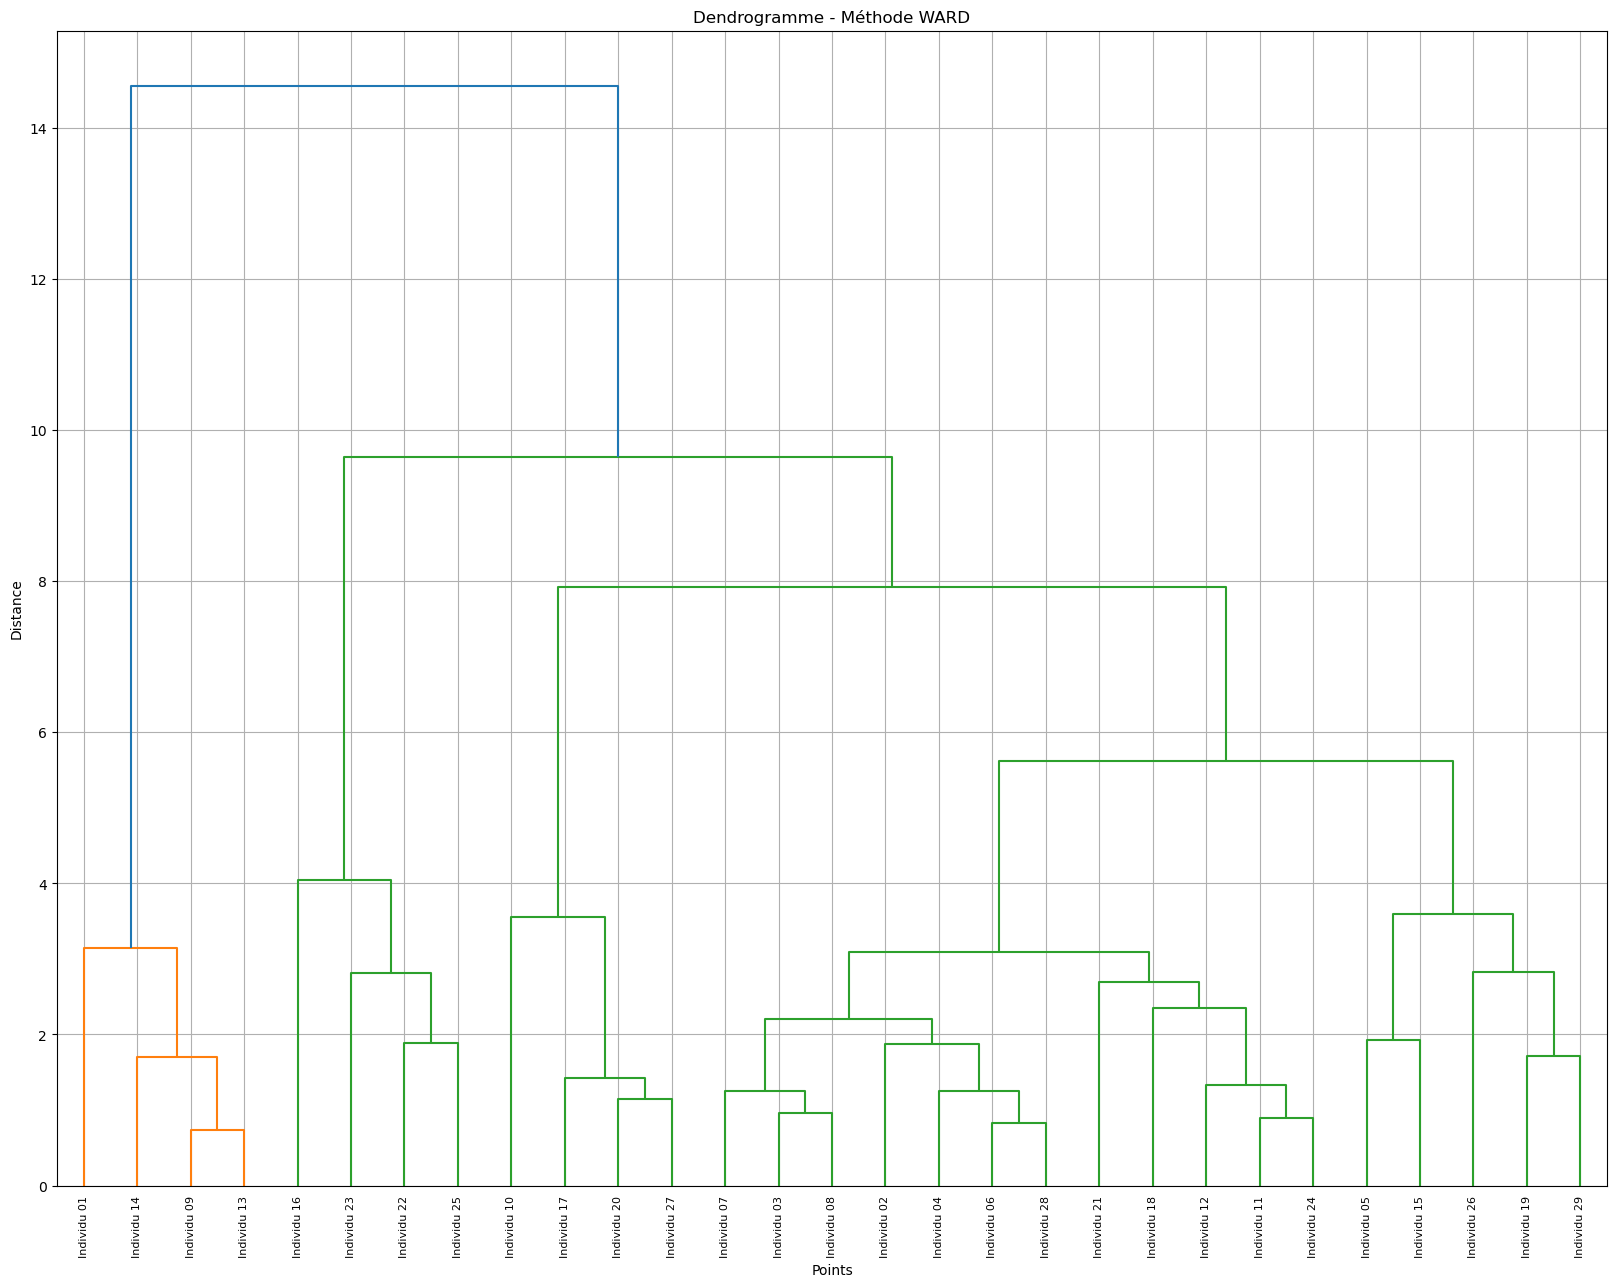

In [32]:
Z = linkage(X_hd, method='ward')

plt.figure(figsize=(20, 15))
dendrogram(Z, labels=individus, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogramme - Méthode WARD")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Partie 6 : Évaluation et Validation du Clustering

**Objectifs** :
- Évaluer la qualité des regroupements obtenus par la CAH
- Utiliser des indices : silhouette, Dunn, etc.
- Comparer avec d'autres méthodes comme K-Means
- Interpréter les résultats


In [33]:
# Découpage en 3 clusters (modifiable)
clusters_hd = fcluster(Z, t=3, criterion='maxclust')
print(f"Découpage en {len(np.unique(clusters_hd))} clusters")

Découpage en 3 clusters


In [34]:
silhouette_hd = silhouette_score(X_hd, clusters_hd)
print(f"Silhouette Score {np.shape(X_hd)} : {silhouette_hd:.4f}")

Silhouette Score (29, 9) : 0.4006


In [35]:
def dunn_index(X, labels):
    '''Blabla'''
    
    clusters = {k: X[labels == k] for k in np.unique(labels)}
    
    # Distance minimale entre clusters
    min_inter = np.inf
    for (_, v1), (_, v2) in combinations(clusters.items(), 2):
        for p1 in v1:
            for p2 in v2:
                dist = np.linalg.norm(p1 - p2)
                if dist < min_inter:
                    min_inter = dist

    # Diamètre (distance max intra-cluster)
    max_intra = 0
    for v in clusters.values():
        for p1, p2 in combinations(v, 2):
            dist = np.linalg.norm(p1 - p2)
            if dist > max_intra:
                max_intra = dist

    return min_inter / max_intra if max_intra != 0 else 0

In [36]:
dunn_hd = dunn_index(X_hd, clusters_hd)
print(f"Indice de Dunn : {dunn_hd:.4f}")

Indice de Dunn : 0.4756


In [37]:
# Ajouter cluster au DataFrame d'origine
df_clustered = pd.DataFrame(X_hd, index=df_hd.index)
df_clustered['cluster'] = clusters_hd
df_clustered

,0,1,2,3,4,5,6,7,8,cluster
,,,,,,,,,,
Individu 01,-2.547004,-1.115157,0.420466,-2.598646,-1.038716,-0.877677,-2.349697,-2.218964,-1.165803,1
Individu 02,0.232136,-0.656307,0.452739,0.643618,-0.773373,-0.808229,-0.375649,0.195060,0.272848,3
Individu 03,0.232136,0.392493,-0.845190,0.393250,-0.221628,-0.591205,0.238499,0.195060,-0.626309,3
Individu 04,-0.022526,-0.047629,1.056100,-0.107486,-0.301652,-0.547800,0.457838,-0.165242,-0.086815,3
Individu 05,0.774677,2.078064,-0.333034,0.881467,0.671273,0.025145,-0.214801,0.915664,-0.176731,3
Individu 06,0.099269,0.579778,0.232442,0.055254,0.233246,-0.426266,-0.068575,0.195060,0.272848,3
Individu 07,0.608593,0.205207,-0.095899,0.480879,-0.676502,-0.539119,0.326235,0.555362,-0.176731,3
Individu 08,-0.000382,0.120928,-0.407402,-0.094967,-0.613325,-0.782186,0.136141,-0.165242,-0.446478,3
Individu 09,-1.749800,-1.761293,-1.508887,-1.722358,-0.175298,0.641494,-1.574701,-1.966753,-1.525466,1


In [38]:
# Moyenne des clusters (centre)
centroids = df_clustered.groupby('cluster').mean()
centroids

,0,1,2,3,4,5,6,7,8
cluster,,,,,,,,,
1,-2.195459,-1.548255,-0.729428,-2.238742,-0.522771,0.300766,-1.896397,-2.029805,-1.413071
2,-0.260580,0.237982,-0.821336,-0.166948,1.997989,1.826448,-0.324470,-0.345393,-0.244168
3,0.467817,0.249576,0.295384,0.458227,-0.280994,-0.405184,0.423022,0.452419,0.315665


In [39]:
# Cohésion
cohesion = 0
for i, row in df_clustered.iterrows():
    cluster_id = row['cluster']
    vector = row.drop('cluster')
    centroid = centroids.loc[cluster_id]
    cohesion += np.linalg.norm(vector - centroid)

# Séparation entre centroïdes
separation = 0
centroid_vals = centroids.values
for i in range(len(centroid_vals)):
    for j in range(i + 1, len(centroid_vals)):
        separation += np.linalg.norm(centroid_vals[i] - centroid_vals[j])

print(f"Cohésion intra-cluster : {cohesion:.4f}")
print(f"Séparation inter-cluster : {separation:.4f}")

Cohésion intra-cluster : 51.2785
Séparation inter-cluster : 14.6867


In [40]:
# KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(X_hd)

In [41]:
# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_clusters = dbscan.fit_predict(X_hd)

In [42]:
def safe_silhouette(X, labels):
    if len(set(labels)) > 1 and -1 not in set(labels):  # -1 = bruit dans DBSCAN
        return silhouette_score(X, labels)
    return -1  # Cas où DBSCAN renvoie un seul cluster ou du bruit

In [43]:
print(f"Silhouette Score CAH     : {safe_silhouette(X_hd, clusters_hd):.4f}")
print(f"Silhouette Score KMeans  : {safe_silhouette(X_hd, kmeans_clusters):.4f}")
print(f"Silhouette Score DBSCAN  : {safe_silhouette(X_hd, dbscan_clusters):.4f}")
print(f"ARI CAH - KMeans    : {adjusted_rand_score(clusters_hd,kmeans_clusters):.4f}")
print(f"ARI CAH - DBSCAN    : {adjusted_rand_score(clusters_hd,dbscan_clusters):.4f}")
print(f"ARI DBSCAN - Kmeans : {adjusted_rand_score(dbscan_clusters, kmeans_clusters):.4f}")

Silhouette Score CAH     : 0.4006
Silhouette Score KMeans  : 0.3603
Silhouette Score DBSCAN  : 0.4907
ARI CAH - KMeans    : 0.5924
ARI CAH - DBSCAN    : 0.5656
ARI DBSCAN - Kmeans : 0.3811


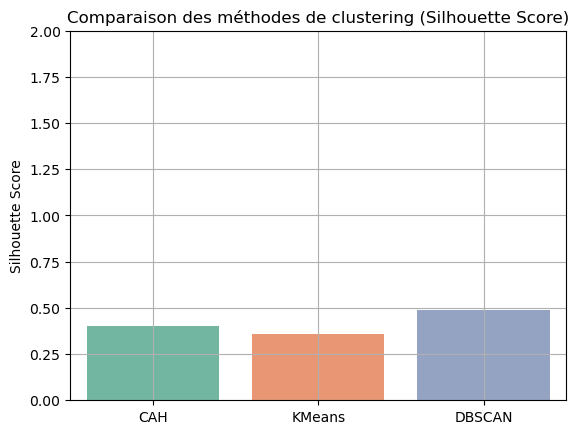

In [44]:
methods = ['CAH', 'KMeans', 'DBSCAN']
scores = [
    safe_silhouette(X_hd, clusters_hd),
    safe_silhouette(X_hd, kmeans_clusters),
    safe_silhouette(X_hd, dbscan_clusters)
]

sns.barplot(x=methods, y=scores, hue=methods, palette="Set2")
plt.title("Comparaison des méthodes de clustering (Silhouette Score)")
plt.ylabel("Silhouette Score")
plt.ylim(0, 2)
plt.grid(True)
plt.show()

## Interprétation des Scores

- Le **Silhouette Score** varie entre -1 et 1 :
  - Proche de 1 → regroupement bien séparé
  - Proche de 0 → clusters proches ou mal définis
  - Négatif → mauvais regroupement

- En comparant la **CAH (Ward)** à **K-Means**, on peut juger de la robustesse du clustering.

- Une **heatmap** des distances permet aussi de repérer les groupes naturellement proches.

On pourra aussi comparer les résultats à d’autres algorithmes (DBSCAN, linkage single/complete...).
- Indice de Dunn élevé → compacité + bonne séparation.
- Forte cohésion → points proches du centre.
- Forte séparation → groupes éloignés.

In [45]:
pd.DataFrame({
    "1 - mean": df_hd[clusters_hd == 1].mean(),
    "1 - median": df_hd[clusters_hd == 1].median(),
    "1 - var": df_hd[clusters_hd == 1].var(),
    "2 - mean": df_hd[clusters_hd == 2].mean(),
    "2 - median": df_hd[clusters_hd == 2].median(),
    "2 - var": df_hd[clusters_hd == 2].var(),
    "3 - mean": df_hd[clusters_hd == 3].mean(),
    "3 - median": df_hd[clusters_hd == 3].median(),
    "3 - var": df_hd[clusters_hd == 3].var(),
}).transpose()

,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
1 - mean,101.750000,44.750000,133.750000,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000
1 - median,97.500000,33.000000,120.550000,5.650000,56.700000,20.200000,7.650000,16.500000,10.500000
1 - var,1092.250000,1020.250000,3825.403333,11.769167,109.456667,83.209167,5.233333,78.916667,3.583333
2 - mean,276.500000,235.500000,127.200000,22.825000,115.000000,34.050000,17.950000,65.000000,24.250000
2 - median,278.000000,234.000000,110.050000,22.450000,109.700000,34.400000,18.650000,65.000000,22.500000
2 - var,3307.666667,5131.666667,4153.180000,20.715833,675.406667,7.430000,26.350000,166.666667,74.916667
3 - mean,342.285714,236.738095,206.785714,27.819048,60.890476,8.342857,23.061905,87.142857,30.476190
3 - median,338.000000,238.000000,211.100000,28.000000,57.600000,5.700000,22.400000,80.000000,28.000000
3 - var,1319.014286,9270.540476,4476.780286,9.265619,172.048905,65.006571,19.665476,261.428571,103.761905


### Question 6.4 - Analyse critique de la méthode

CAH avec méthode ward...
CAH avec méthode complete...
CAH avec méthode average...
CAH avec méthode single...


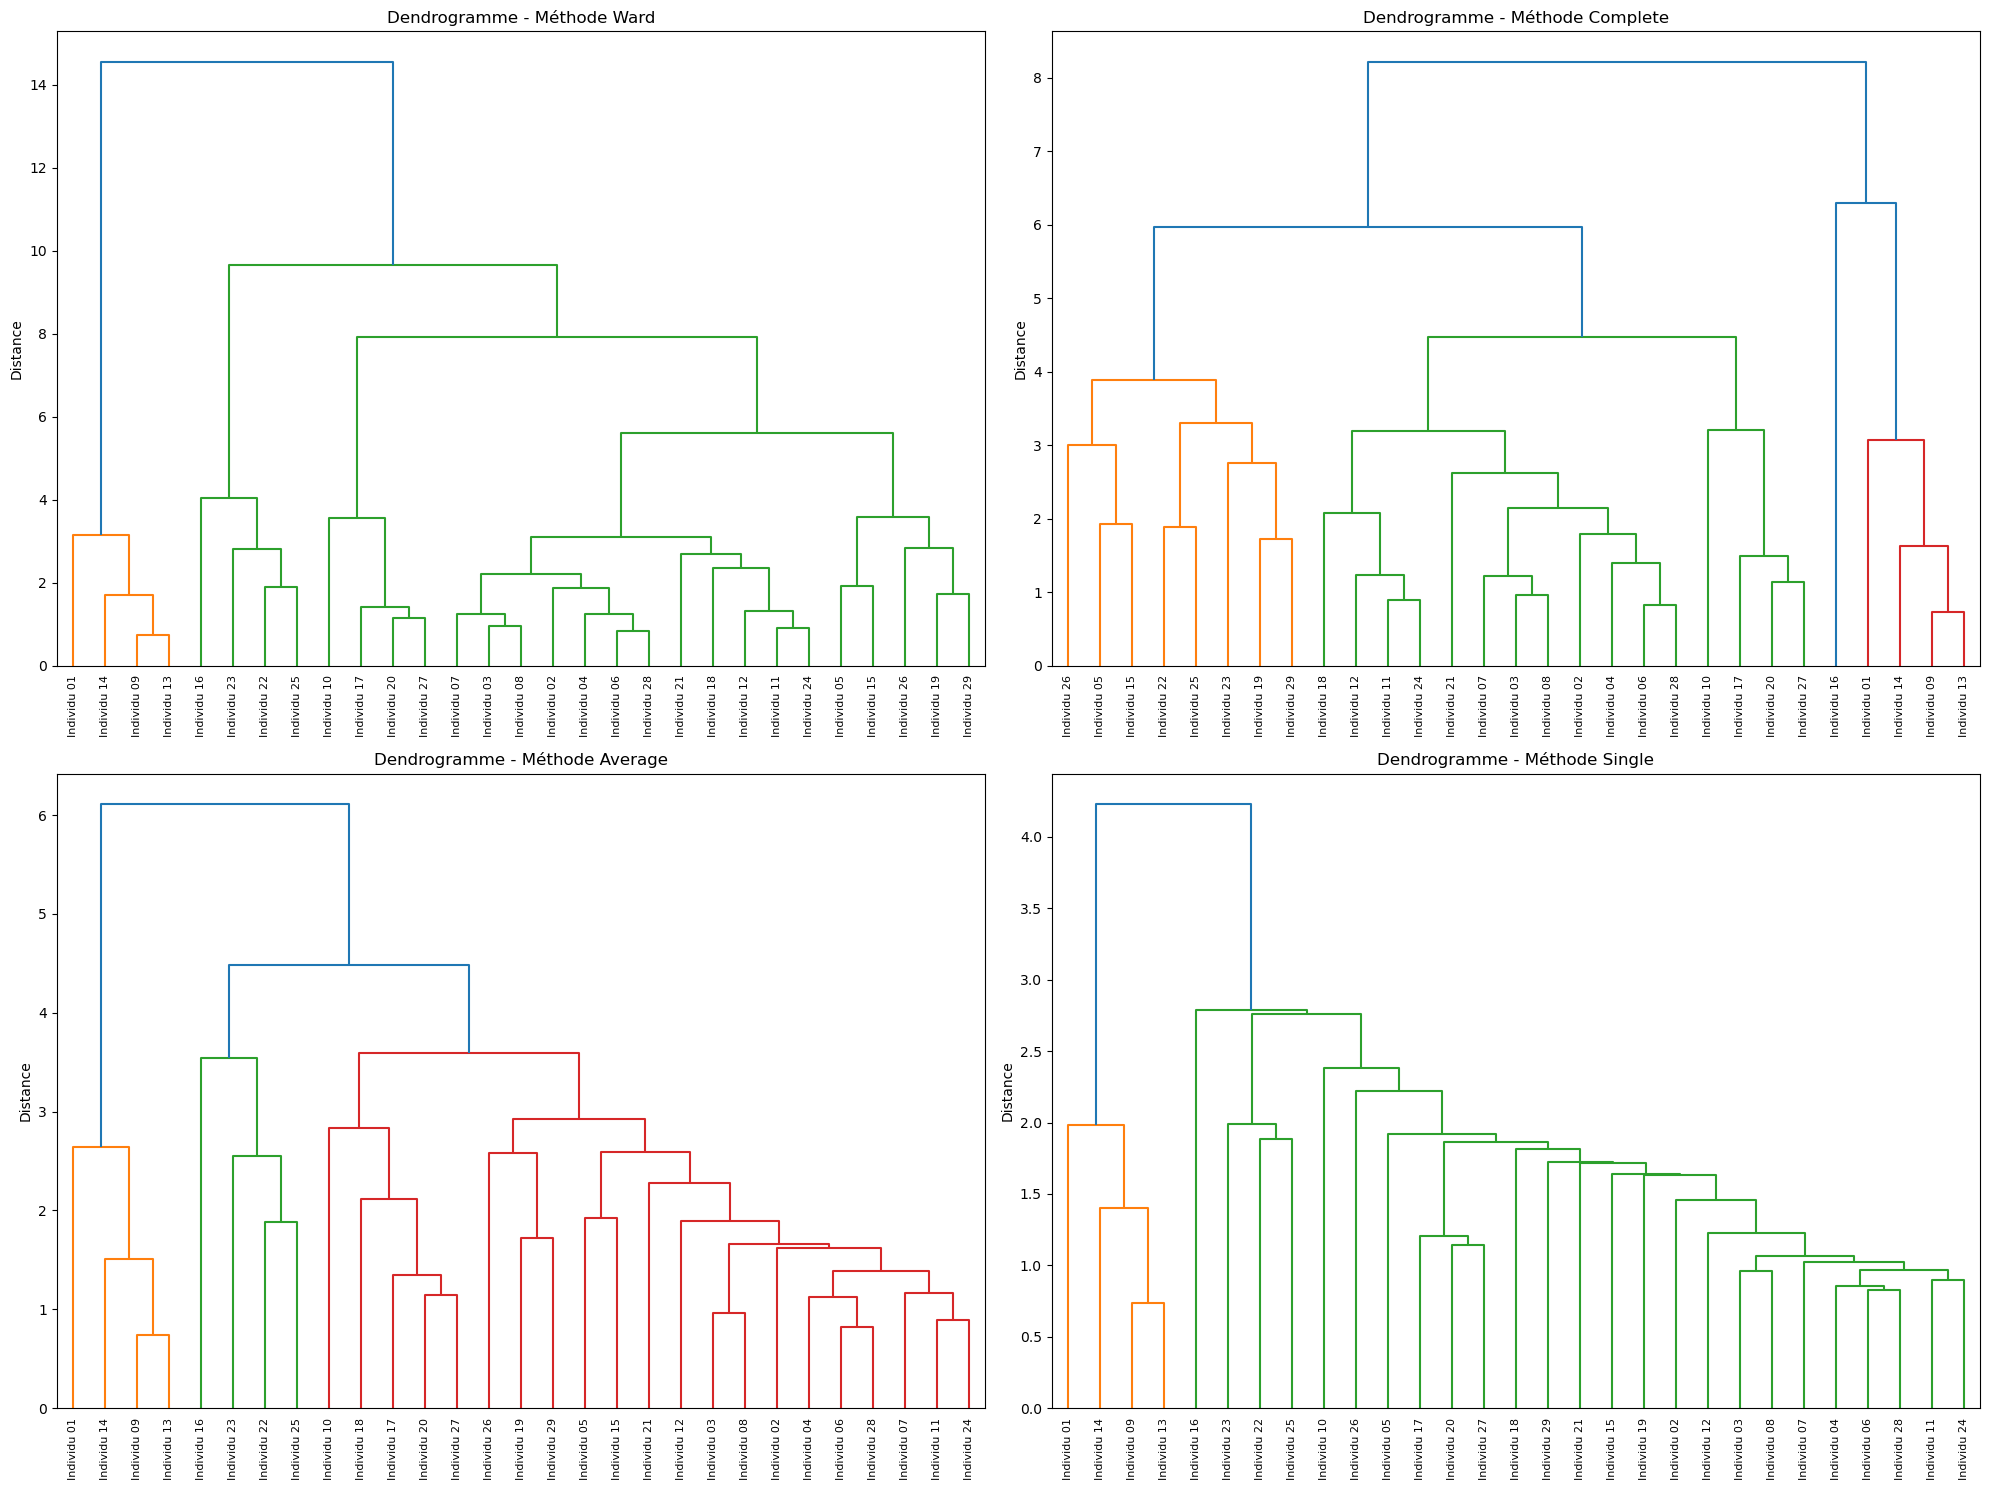

In [46]:
# CAH avec différentes méthodes de linkage
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

linkage_results = {}

for i, method in enumerate(linkage_methods):
    print(f"CAH avec méthode {method}...")
    
    # Calcul de la matrice de linkage
    Z = linkage(X_hd, method=method)
    
    linkage_results[method] = Z
    
    # Création du dendrogramme
    dendrogram(Z, labels=individus, ax=axes[i], leaf_rotation=90, leaf_font_size=8)
    axes[i].set_title(f'Dendrogramme - Méthode {method.capitalize()}')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Utilisation de la méthode de Ward pour la suite (recommandée pour les données continues)
Z_ward = linkage_results['ward']

In [47]:
def cluster_and_label(X, method, k=3):
    '''Blabla'''
    Z = linkage(X, method=method)
    return fcluster(Z, t=k, criterion='maxclust')

In [48]:
def test_sensitivity(X, method, n_trials=20, eps=0.05, k=3):
    '''Blabla (need lot of talk, take exemple below)'''
    base_labels = cluster_and_label(X, method, k)
    scores = []
    for _ in range(n_trials):
        perturbed = X + np.random.normal(loc=0.0, scale=eps, size=X.shape)
        perturbed_labels = cluster_and_label(perturbed, method, k)
        score = adjusted_rand_score(base_labels, perturbed_labels)
        scores.append(score)
    return np.mean(scores)

In [49]:
def test_robustness(X, method, noise_strength=5.0, k=3):
    '''Blabla (good talk here)'''
    
    base_labels = cluster_and_label(X, method, k)
    
    noise_point = X.max(axis=0) # Générer un point bruité très éloigné
    X_aug = np.vstack([X, noise_point]) # Ajouter à X

    new_labels = cluster_and_label(X_aug, method, k)
    
    # Comparer les 29 premiers points (hors bruit)
    return adjusted_rand_score(base_labels, new_labels[:len(X)])

In [50]:
print("Sensibilité (ARI moyen sur perturbations) :")
for m in linkage_methods:
    score = test_sensitivity(X_hd, m, eps=1, n_trials=20, k=3)
    print(f"{m:8} → {score:.4f}")

print()

print("Robustesse (ARI avec outlier ajouté) :")
for m in linkage_methods:
    score = test_robustness(X_hd, m, noise_strength=5, k=3)
    print(f"{m:8} → {score:.4f}")

Sensibilité (ARI moyen sur perturbations) :
ward     → 0.3755
complete → 0.4330
average  → 0.6238
single   → 0.4182

Robustesse (ARI avec outlier ajouté) :
ward     → 0.3241
complete → 0.9766
average  → 0.5656
single   → 0.8527


# Partie Avancée - Visualisation et Analyse Multidimensionnelle

## Visualisation avancée

### Standardisation des données

In [51]:
# Standardisation des données (centrage-réduction)
# Sélectionner uniquement les colonnes numériques
X_numeric = df_hd.select_dtypes(include='number')

# Appliquer la standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Recréer un DataFrame avec les bons noms de colonnes et d'index
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=df_hd.index)

In [52]:
print("Données standardisées:")

pd.DataFrame({
    "Moyennes après standardisation": X_scaled_df.mean(),
    "Écarts-types après standardisation": X_scaled_df.std(),
}).transpose()

Données standardisées:


,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
Moyennes après standardisation,-1.110223e-16,9.188053e-17,2.297013e-17,3.656079e-16,2.297013e-17,9.188053e-17,-3.947991e-16,-1.856752e-16,3.062684e-17
Écarts-types après standardisation,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00


In [53]:
print("Statistiques descriptives des données originales:")

X_scaled_df.describe()

Statistiques descriptives des données originales:


,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,-1.110223e-16,9.188053e-17,2.297013e-17,3.656079e-16,2.297013e-17,9.188053e-17,-3.947991e-16,-1.856752e-16,3.062684e-17
std,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00
min,-2.547004e+00,-1.761293e+00,-1.587464e+00,-2.598646e+00,-1.283000e+00,-1.025253e+00,-2.349697e+00,-2.327055e+00,-1.525466e+00
25%,-8.895996e-02,-6.563073e-01,-7.413554e-01,-9.496711e-02,-6.722898e-01,-7.040573e-01,-3.464039e-01,-1.652420e-01,-6.263092e-01
50%,2.321359e-01,1.209284e-01,2.324417e-01,2.680663e-01,-2.216276e-01,-5.738426e-01,1.215187e-01,1.950601e-01,-8.681513e-02
75%,6.085930e-01,6.172356e-01,4.878179e-01,6.185812e-01,3.722357e-01,7.022612e-01,4.724606e-01,5.553622e-01,2.728476e-01
max,1.173279e+00,2.078064e+00,2.088830e+00,1.144354e+00,3.493177e+00,2.030451e+00,2.271038e+00,1.636269e+00,2.161077e+00


### Analyse en Composantes Principales (ACP)

In [54]:
# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcul de la variance expliquée
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print(f"""\
Analyse en Composantes Principales:

Variance expliquée par chaque composante: {variance_explained.round(3)}
Variance cumulée: {cumulative_variance.round(3)}
Nombre de composantes pour expliquer 80% de la variance: {np.argmax(cumulative_variance >= 0.8) + 1}
Nombre de composantes pour expliquer 95% de la variance: {np.argmax(cumulative_variance >= 0.95) + 1}\
""")

Analyse en Composantes Principales:

Variance expliquée par chaque composante: [0.561 0.205 0.096 0.064 0.039 0.019 0.011 0.003 0.001]
Variance cumulée: [0.561 0.766 0.862 0.927 0.966 0.985 0.996 0.999 1.   ]
Nombre de composantes pour expliquer 80% de la variance: 3
Nombre de composantes pour expliquer 95% de la variance: 5


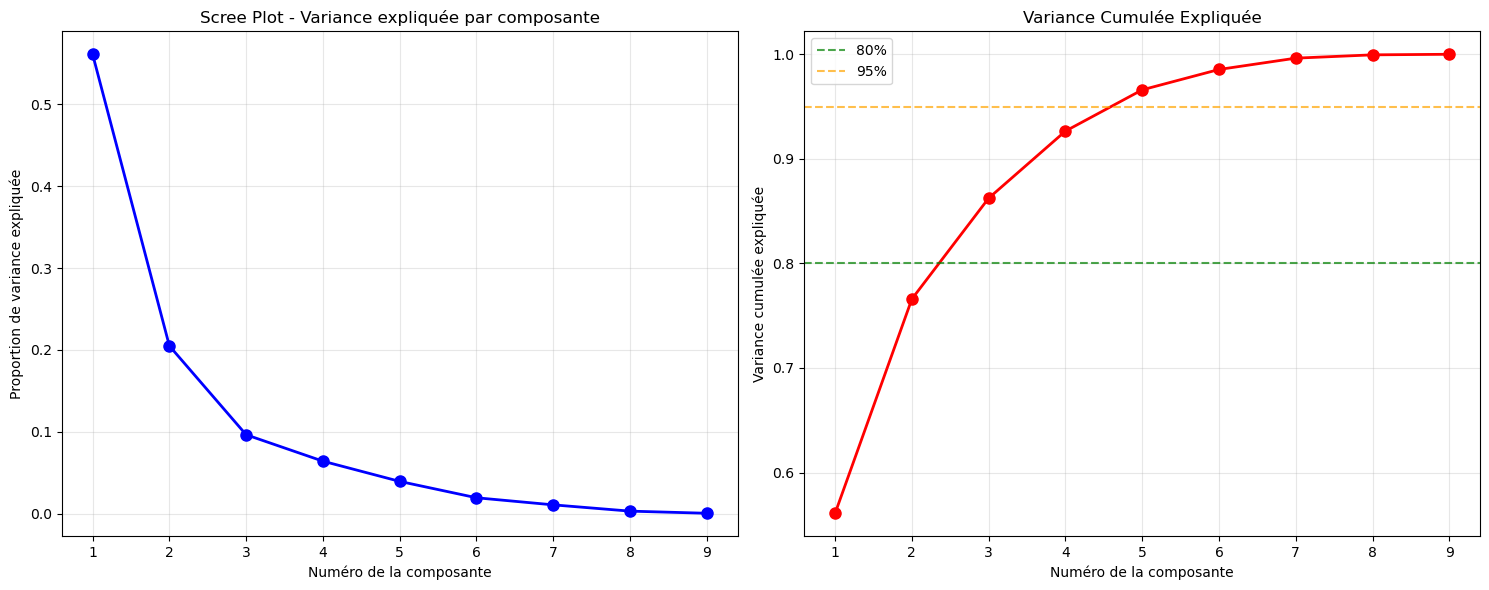

In [55]:
# Visualisation du scree plot (éboulis des valeurs propres)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique des valeurs propres
ax1.plot(range(1, len(variance_explained) + 1), variance_explained, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Numéro de la composante')
ax1.set_ylabel('Proportion de variance expliquée')
ax1.set_title('Scree Plot - Variance expliquée par composante')
ax1.grid(True, alpha=0.3)

# Graphique de la variance cumulée
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='g', linestyle='--', alpha=0.7, label='80%')
ax2.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95%')
ax2.set_xlabel('Numéro de la composante')
ax2.set_ylabel('Variance cumulée expliquée')
ax2.set_title('Variance Cumulée Expliquée')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

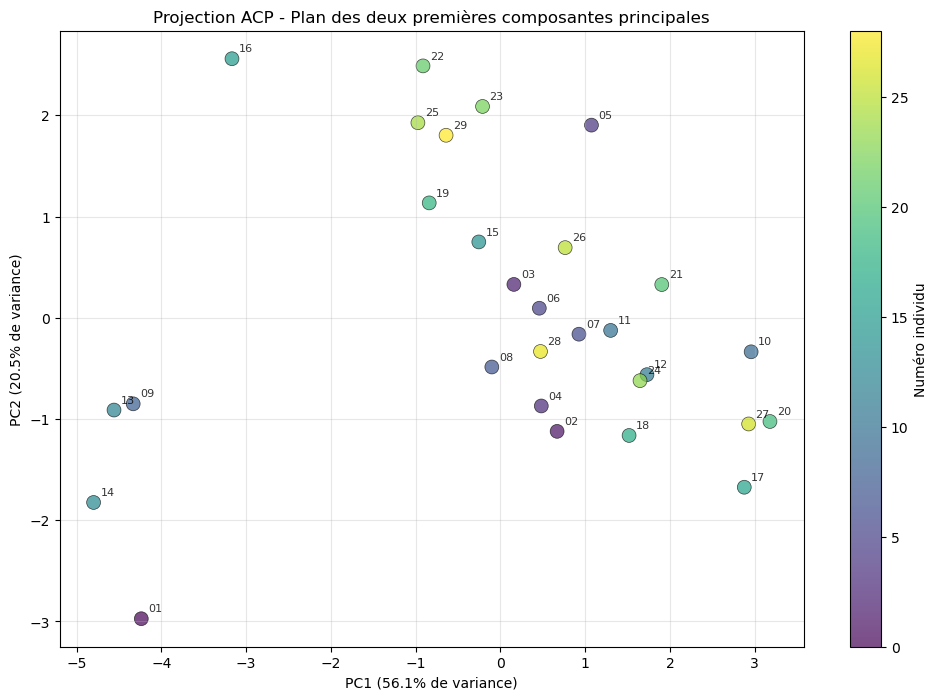

In [56]:
# Visualisation en 2D avec les deux premières composantes principales
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=range(len(individus)), 
                     cmap='viridis', s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Ajout des étiquettes pour chaque point
for i, txt in enumerate(individus):
    plt.annotate(txt.replace('Individu ', ''), (X_pca[i, 0], X_pca[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.xlabel(f'PC1 ({variance_explained[0]:.1%} de variance)')
plt.ylabel(f'PC2 ({variance_explained[1]:.1%} de variance)')
plt.title('Projection ACP - Plan des deux premières composantes principales')
plt.colorbar(scatter, label='Numéro individu')
plt.grid(True, alpha=0.3)
plt.show()

In [57]:
# Analyse des contributions des variables aux composantes principales
components_df = pd.DataFrame(
    pca.components_[:4].T,  # Premières 4 composantes
    columns=[f'PC{i+1}' for i in range(4)],
    index=df_hd.columns
)

print("Contributions des variables aux composantes principales:")
components_df.round(3)

Contributions des variables aux composantes principales:


,PC1,PC2,PC3,PC4
Données 1,0.425,0.183,-0.064,-0.168
Données 2,0.151,0.459,-0.576,0.589
Données 3,0.294,-0.378,0.197,0.616
Données 4,0.407,0.231,-0.120,-0.231
Données 5,-0.073,0.510,0.648,0.286
Données 6,-0.228,0.516,0.172,-0.124
Données 7,0.408,0.053,0.164,0.043
Données 8,0.416,0.123,-0.036,-0.305
Données 9,0.384,-0.125,0.364,-0.005


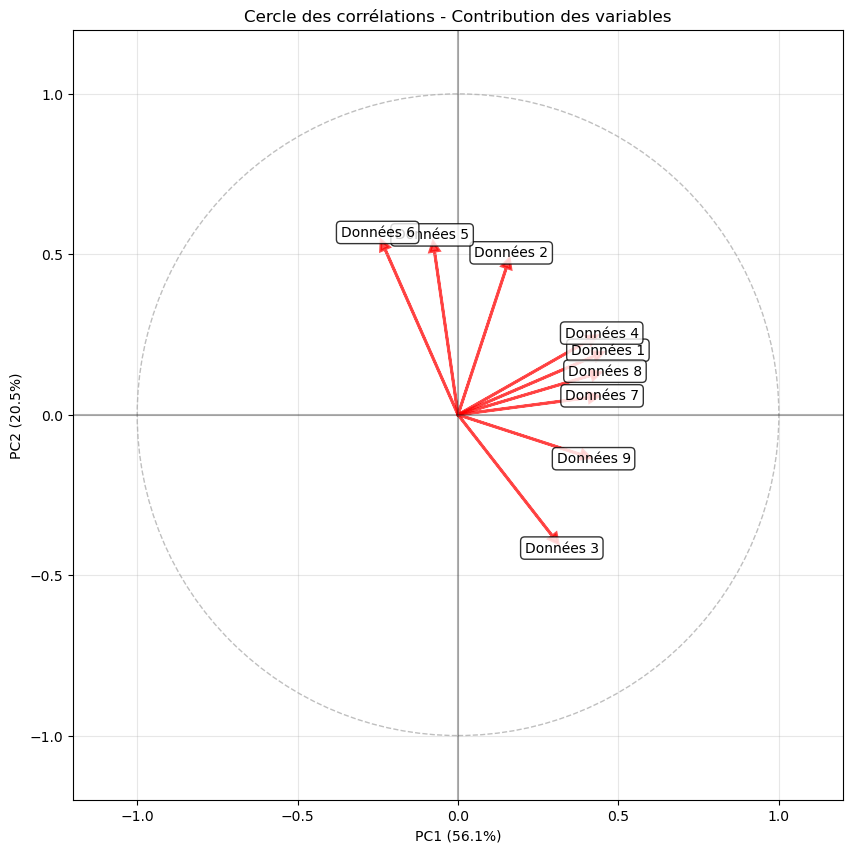

In [58]:
# Visualisation des contributions (cercle des corrélations pour PC1 et PC2)
fig, ax = plt.subplots(figsize=(10, 10))

# Tracé du cercle unitaire
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
ax.add_patch(circle)

# Tracé des vecteurs variables
for i, (var, (pc1, pc2, *_)) in zip(df_hd.columns, components_df.iterrows()):
    ax.arrow(0, 0, pc1, pc2, head_width=0.03, head_length=0.03, 
             fc='red', ec='red', alpha=0.7, linewidth=2)
    ax.annotate(var, (pc1*1.1, pc2*1.1), fontsize=10, ha='center', va='center',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
ax.set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
ax.set_title('Cercle des corrélations - Contribution des variables')
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.show()


### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [59]:
# Application de t-SNE avec différents paramètres de perplexité
# Adaptation automatique selon la taille du dataset
n_samples = X_hd.shape[0]
print(f"Nombre d'échantillons: {n_samples}")

# Définir les perplexités en fonction du nombre d'échantillons
# La perplexité doit être < n_samples
max_perplexity = min(30, n_samples - 1)
perplexities = []

Nombre d'échantillons: 29


In [60]:
# Générer des valeurs de perplexité adaptées\
if n_samples <= 10:
    perplexities = [2, 3, 5, min(7, n_samples-1)]
elif n_samples <= 20:
    perplexities = [3, 5, 8, min(15, n_samples-1)]
else:
    perplexities = [5, 10, 20, min(30, n_samples-1)]

# Supprimer les doublons et trier
perplexities = sorted(list(set([p for p in perplexities if p < n_samples])))
print(f"Perplexités testées: {perplexities}")

Perplexités testées: [5, 10, 20, 28]


In [61]:
def tsne_compute(perplexities) -> dict:
    '''Blabla'''
    
    tsne_results = {}
    
    for i, perp in enumerate(perplexities):
        print(f"Calcul t-SNE avec perplexité = {perp}...")
        
        # Utiliser max_iter au lieu de n_iter pour éviter le warning
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42, max_iter=1000)
        X_tsne = tsne.fit_transform(X_scaled)
        tsne_results[perp] = X_tsne
        
        # Visualisation
        scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=range(len(individus)), 
                                 cmap='viridis', s=80, alpha=0.7, edgecolors='black', linewidth=0.5)
        
        # Ajout des étiquettes
        for j, txt in enumerate(individus):
            axes[i].annotate(txt.replace('Individu ', ''), (X_tsne[j, 0], X_tsne[j, 1]), 
                            xytext=(3, 3), textcoords='offset points', fontsize=7, alpha=0.8)
        
        axes[i].set_title(f't-SNE (perplexité = {perp})')
        axes[i].grid(True, alpha=0.3)
    
    # Masquer les axes inutilisés si nécessaire
    if n_plots < len(axes):
        for i in range(n_plots, len(axes)):
            axes[i].set_visible(False)

    return tsne_results

4
Calcul t-SNE avec perplexité = 5...
Calcul t-SNE avec perplexité = 10...
Calcul t-SNE avec perplexité = 20...
Calcul t-SNE avec perplexité = 28...


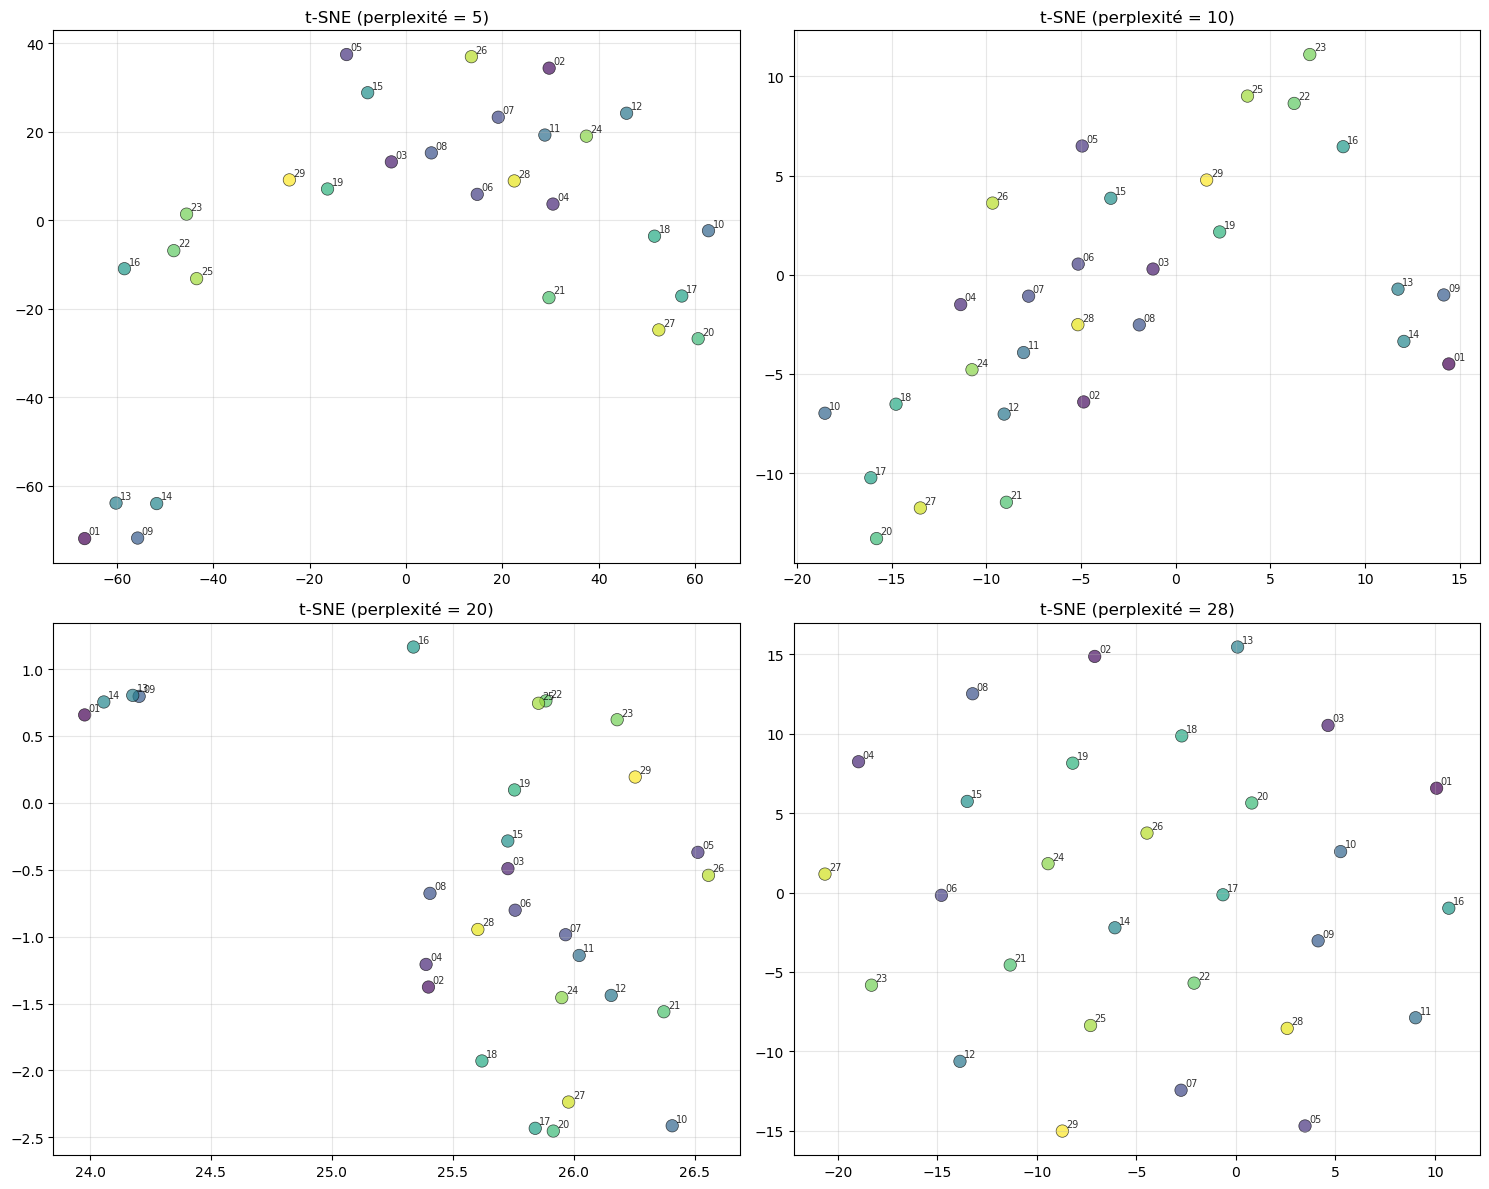

In [62]:
# Créer la grille de sous-graphiques
n_plots = len(perplexities)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

print(len(perplexities))
tsne_results = tsne_compute(perplexities)
plt.tight_layout()
plt.show()

In [63]:
# Utilisation de la perplexité optimale pour la suite
# Choisir une perplexité intermédiaire
best_perplexity = perplexities[len(perplexities)//2]

X_tsne_final = tsne_results[best_perplexity]
print(f"""\
Utilisation de t-SNE avec perplexité = {best_perplexity} pour les analyses suivantes
""")

# Affichage d'informations sur la qualité du t-SNE
print(f"""\
Forme des données d'entrée: {X_scaled.shape}
Forme des données t-SNE: {X_tsne_final.shape}
""")

# Si vous voulez analyser l'impact de la perplexité
if len(perplexities) > 1:
    print(f"""\
Recommandations selon la perplexité:
- Faible perplexité ({min(perplexities)}): met l'accent sur la structure locale
- Forte perplexité ({max(perplexities)}): préserve mieux la structure globale
- Perplexité choisie ({best_perplexity}): bon compromis entre structure locale et globale\
""")

Utilisation de t-SNE avec perplexité = 20 pour les analyses suivantes

Forme des données d'entrée: (29, 9)
Forme des données t-SNE: (29, 2)

Recommandations selon la perplexité:
- Faible perplexité (5): met l'accent sur la structure locale
- Forte perplexité (28): préserve mieux la structure globale
- Perplexité choisie (20): bon compromis entre structure locale et globale


### Détermination du nombre optimal de clusters

In [64]:
# Calcul des indices de qualité pour différents nombres de clusters
n_clusters_range = range(2, 11)
silhouette_scores = []
inertias = []

In [65]:
for n_clusters in n_clusters_range:
    # Classification avec CAH
    clusters = fcluster(Z_ward, n_clusters, criterion='maxclust')
    
    # Calcul du score de silhouette
    sil_score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(sil_score)
    
    # Calcul de l'inertie intra-cluster
    inertia = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X_scaled[clusters == cluster_id]
        if len(cluster_points) > 1:
            centroid = cluster_points.mean(axis=0)
            inertia += np.sum((cluster_points - centroid) ** 2)
    inertias.append(inertia)

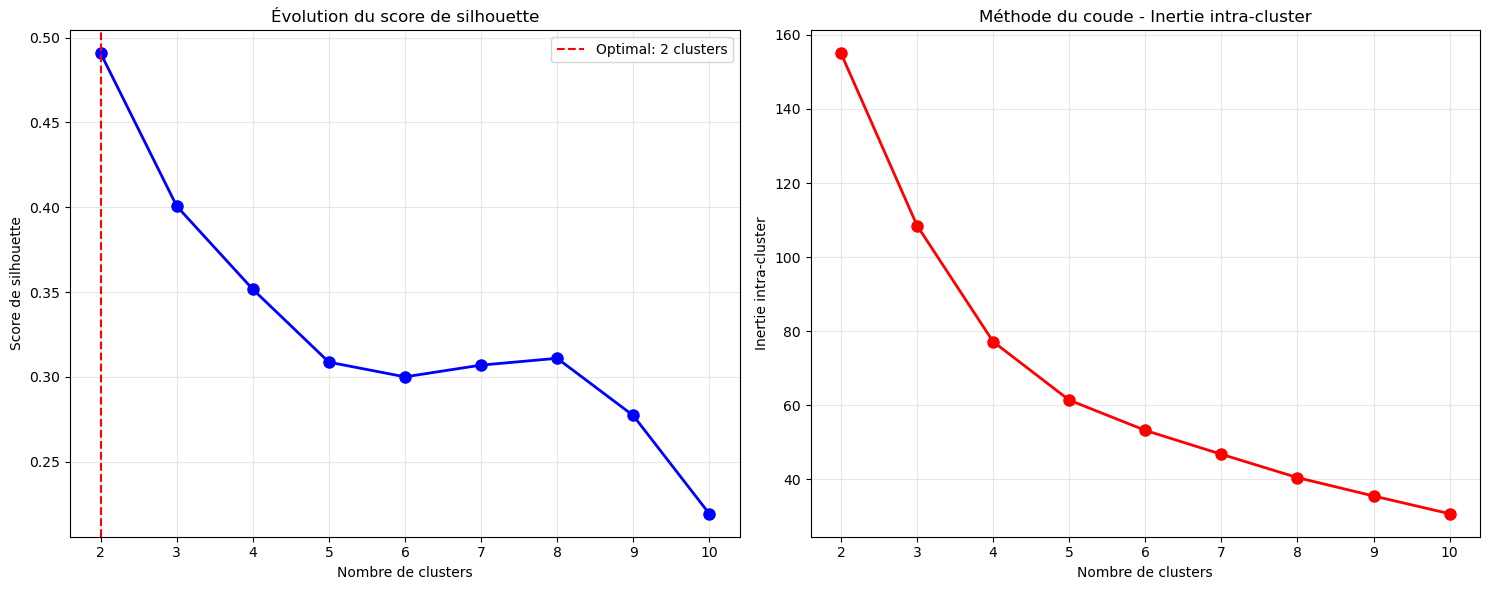

In [66]:
# Visualisation des indices de qualité
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Score de silhouette
ax1.plot(n_clusters_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Nombre de clusters')
ax1.set_ylabel('Score de silhouette')
ax1.set_title('Évolution du score de silhouette')
ax1.grid(True, alpha=0.3)
optimal_clusters_sil = n_clusters_range[np.argmax(silhouette_scores)]
ax1.axvline(x=optimal_clusters_sil, color='red', linestyle='--', 
           label=f'Optimal: {optimal_clusters_sil} clusters')
ax1.legend()

# Méthode du coude (inertie)
ax2.plot(n_clusters_range, inertias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Nombre de clusters')
ax2.set_ylabel('Inertie intra-cluster')
ax2.set_title('Méthode du coude - Inertie intra-cluster')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [67]:
print(f"""\
Nombre optimal de clusters selon le score de silhouette: {optimal_clusters_sil}
Score de silhouette maximal: {max(silhouette_scores):.3f}\
""")

Nombre optimal de clusters selon le score de silhouette: 2
Score de silhouette maximal: 0.491


### Analyse des clusters finaux

In [68]:
# Classification finale avec le nombre optimal de clusters
optimal_n_clusters = optimal_clusters_sil
final_clusters = fcluster(Z_ward, optimal_n_clusters, criterion='maxclust')

# Ajout des clusters au DataFrame
df_clustered = df_hd.copy()
df_clustered['Cluster'] = final_clusters

print(f"""\
Classification finale avec {optimal_n_clusters} clusters:
Répartition des individus par cluster:
""")

cluster_counts = pd.Series(final_clusters).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"  Cluster {cluster_id}: {count} individus")

Classification finale avec 2 clusters:
Répartition des individus par cluster:

  Cluster 1: 4 individus
  Cluster 2: 25 individus


In [69]:
# Analyse descriptive des clusters
print("\nAnalyse descriptive des clusters:")
print("="*50)

cluster_stats = df_hd.copy()
cluster_stats['Cluster'] = final_clusters

for cluster_id in sorted(np.unique(final_clusters)):
    print(f"\nCluster {cluster_id}:")
    cluster_data = cluster_stats[cluster_stats['Cluster'] == cluster_id]
    individuals_in_cluster = df_clustered[df_clustered['Cluster'] == cluster_id].index.tolist()
    print(f"Individus: {individuals_in_cluster}")
    print("Statistiques moyennes:")
    for col in df_hd.columns:
        mean_val = cluster_data[col].mean()
        std_val = cluster_data[col].std()
        print(f"  {col}: {mean_val:.2f} ± {std_val:.2f}")


Analyse descriptive des clusters:

Cluster 1:
Individus: ['Individu 01', 'Individu 09', 'Individu 13', 'Individu 14']
Statistiques moyennes:
  Données 1: 101.75 ± 33.05
  Données 2: 44.75 ± 31.94
  Données 3: 133.75 ± 61.85
  Données 4: 6.28 ± 3.43
  Données 5: 55.15 ± 10.46
  Données 6: 16.48 ± 9.12
  Données 7: 7.20 ± 2.29
  Données 8: 18.25 ± 8.88
  Données 9: 11.25 ± 1.89

Cluster 2:
Individus: ['Individu 02', 'Individu 03', 'Individu 04', 'Individu 05', 'Individu 06', 'Individu 07', 'Individu 08', 'Individu 10', 'Individu 11', 'Individu 12', 'Individu 15', 'Individu 16', 'Individu 17', 'Individu 18', 'Individu 19', 'Individu 20', 'Individu 21', 'Individu 22', 'Individu 23', 'Individu 24', 'Individu 25', 'Individu 26', 'Individu 27', 'Individu 28', 'Individu 29']
Statistiques moyennes:
  Données 1: 331.76 ± 46.03
  Données 2: 236.54 ± 91.47
  Données 3: 194.05 ± 71.67
  Données 4: 27.02 ± 3.72
  Données 5: 69.55 ± 25.25
  Données 6: 12.46 ± 12.15
  Données 7: 22.24 ± 4.83
  Donnée

### Heatmap des distances

In [70]:
# Calcul de la matrice de distances
distance_matrix = squareform(pdist(X_scaled, metric='euclidean'))
distance_df = pd.DataFrame(distance_matrix, index=individus, columns=individus)

# Réorganisation selon les clusters
cluster_order = np.argsort(final_clusters)
ordered_individuals = [individus[i] for i in cluster_order]
ordered_distance_matrix = distance_df.loc[ordered_individuals, ordered_individuals]

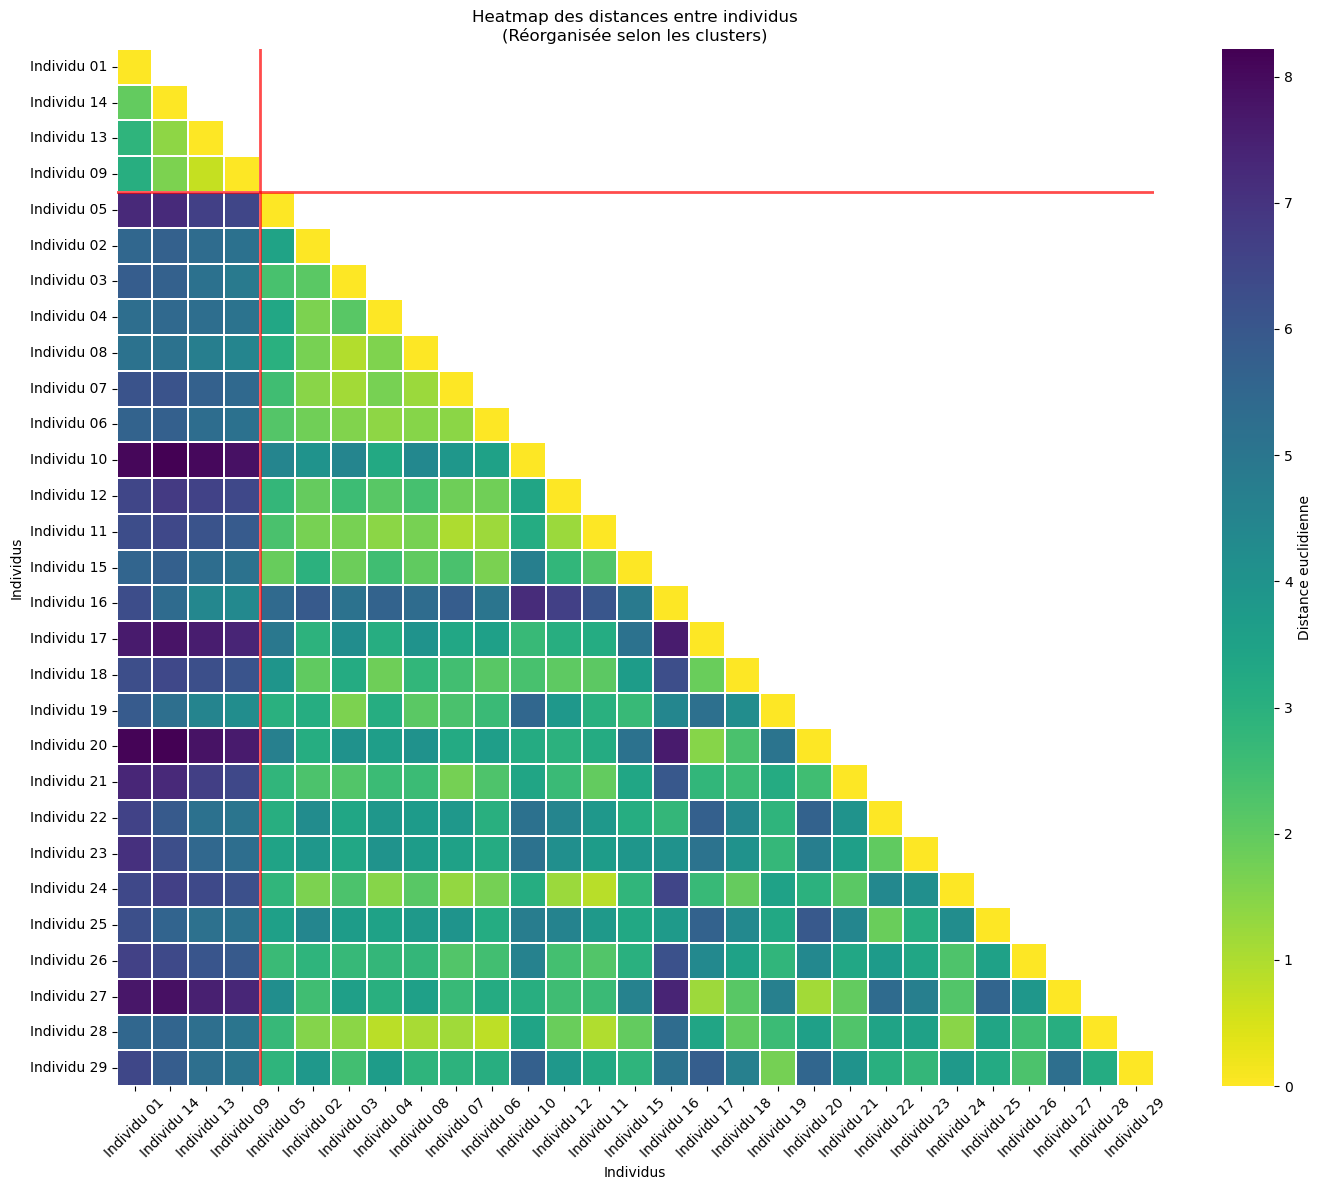

In [71]:
# Création de la heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(ordered_distance_matrix, dtype=bool), k=1)
sns.heatmap(ordered_distance_matrix, 
            annot=False, 
            cmap='viridis_r', 
            square=True,
            linewidths=0.1,
            cbar_kws={'label': 'Distance euclidienne'},
            mask=mask)
plt.title('Heatmap des distances entre individus\n(Réorganisée selon les clusters)')
plt.xlabel('Individus')
plt.ylabel('Individus')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Ajout des séparateurs de clusters
cluster_boundaries = []
current_cluster = final_clusters[cluster_order[0]]
boundary = 0

for i, cluster in enumerate(final_clusters[cluster_order]):
    if cluster != current_cluster:
        cluster_boundaries.append(i)
        current_cluster = cluster

cluster_boundaries.append(len(final_clusters))

for boundary in cluster_boundaries[:-1]:
    plt.axhline(y=boundary, color='red', linewidth=2, alpha=0.7)
    plt.axvline(x=boundary, color='red', linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

### Visualisation finale des clusters

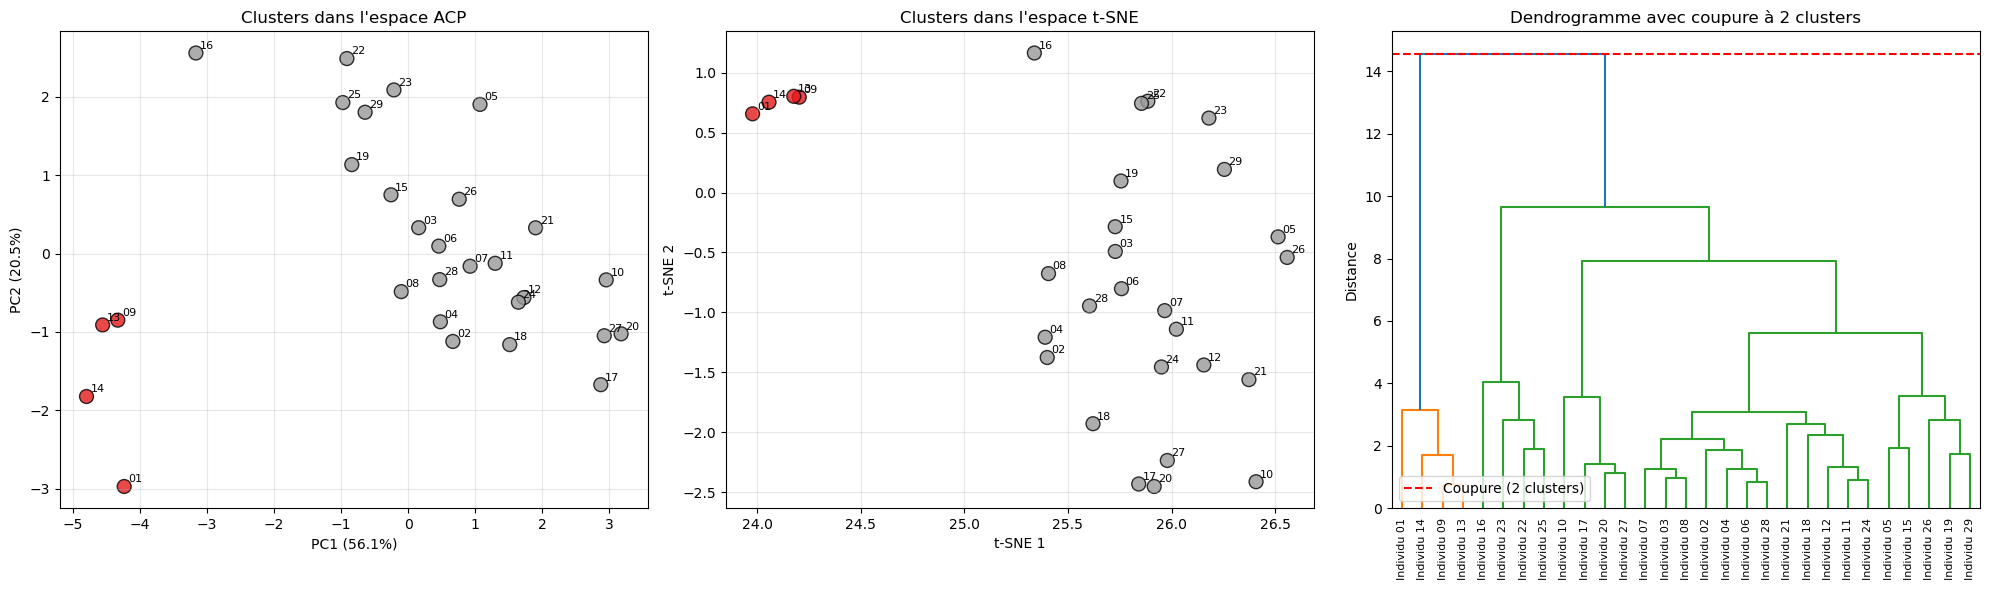

In [72]:
# Visualisation des clusters dans l'espace ACP
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Dans l'espace ACP
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=final_clusters, 
                          cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
for i, txt in enumerate(individus):
    axes[0].annotate(txt.replace('Individu ', ''), (X_pca[i, 0], X_pca[i, 1]), 
                    xytext=(3, 3), textcoords='offset points', fontsize=8)
axes[0].set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
axes[0].set_title('Clusters dans l\'espace ACP')
axes[0].grid(True, alpha=0.3)

# Dans l'espace t-SNE
scatter2 = axes[1].scatter(X_tsne_final[:, 0], X_tsne_final[:, 1], c=final_clusters, 
                          cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
for i, txt in enumerate(individus):
    axes[1].annotate(txt.replace('Individu ', ''), (X_tsne_final[i, 0], X_tsne_final[i, 1]), 
                    xytext=(3, 3), textcoords='offset points', fontsize=8)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('Clusters dans l\'espace t-SNE')
axes[1].grid(True, alpha=0.3)

# Dendrogramme avec coupure
dendrogram(Z_ward, labels=individus, ax=axes[2], leaf_rotation=90, leaf_font_size=8,
          color_threshold=Z_ward[-optimal_n_clusters+1, 2])
axes[2].set_title(f'Dendrogramme avec coupure à {optimal_n_clusters} clusters')
axes[2].set_ylabel('Distance')
axes[2].axhline(y=Z_ward[-optimal_n_clusters+1, 2], color='red', linestyle='--', 
               label=f'Coupure ({optimal_n_clusters} clusters)')
axes[2].legend()

plt.tight_layout()
plt.show()

### Comparaison avec d'autres méthodes de clustering

In [73]:
# Comparaison avec K-means
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Calcul de l'indice de Rand ajusté pour comparer les méthodes
ari_score = adjusted_rand_score(final_clusters, kmeans_clusters)
print(f"Indice de Rand ajusté entre CAH et K-means: {ari_score:.3f}")

Indice de Rand ajusté entre CAH et K-means: 0.826


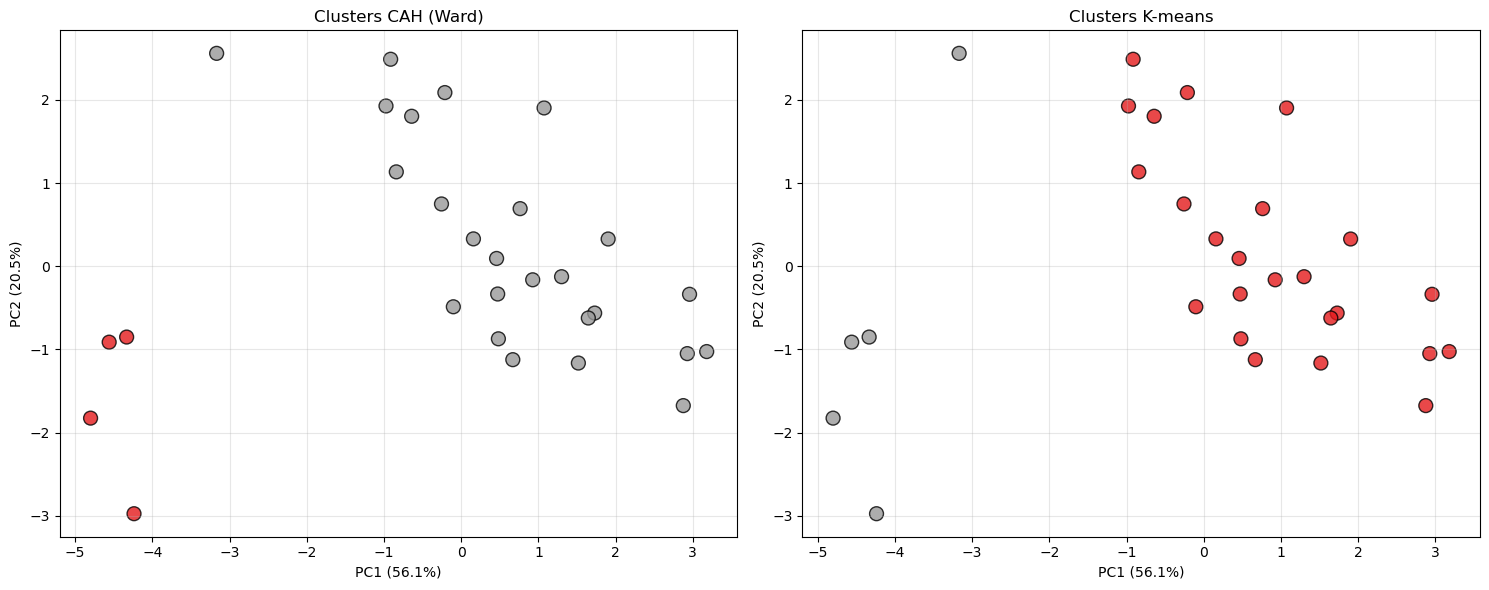

In [74]:
# Visualisation comparative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# CAH
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=final_clusters, 
                      cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
ax1.set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
ax1.set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
ax1.set_title('Clusters CAH (Ward)')
ax1.grid(True, alpha=0.3)

# K-means
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, 
                      cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
ax2.set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
ax2.set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
ax2.set_title('Clusters K-means')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Profil des clusters

In [75]:
# Création d'un profil radar pour chaque cluster
def create_radar_chart(data, labels, title):
    """Création d'un graphique radar"""
    N = len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Fermeture du cercle
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    for i, (cluster_name, values) in enumerate(data.items()):
        values += values[:1]  # Fermeture du cercle
        ax.plot(angles, values, 'o-', linewidth=2, label=cluster_name)
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(-2, 2)  # Pour les données standardisées
    ax.set_title(title, size=16, weight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    return fig, ax

In [76]:
# Calcul des profils moyens standardisés pour chaque cluster
cluster_profiles = {}
for cluster_id in sorted(np.unique(final_clusters)):
    mask = final_clusters == cluster_id
    profile = X_scaled[mask].mean(axis=0)
    cluster_profiles[f'Cluster {cluster_id}'] = profile.tolist()

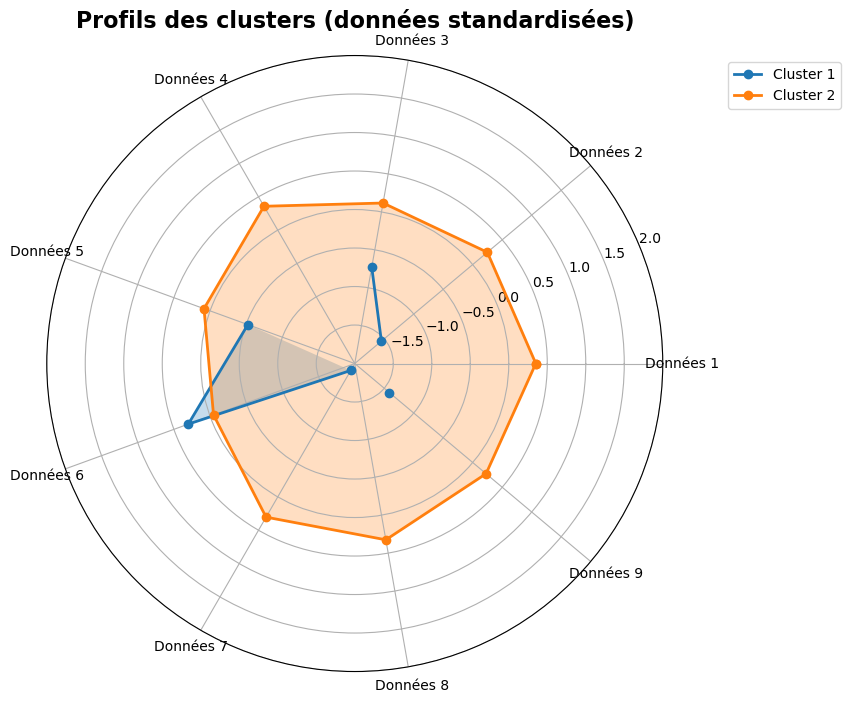

In [77]:
# Création du graphique radar
fig, ax = create_radar_chart(cluster_profiles, list(df_hd.columns), 
                           'Profils des clusters (données standardisées)')
plt.show()

### Synthèse et conclusions

In [78]:
print("="*80)
print("SYNTHÈSE DE L'ANALYSE MULTIDIMENSIONNELLE")
print("="*80)

print(f"\n1. RÉDUCTION DE DIMENSIONNALITÉ:")
print(f"   - Variance expliquée par PC1 et PC2: {(variance_explained[0] + variance_explained[1]):.1%}")
print(f"   - Nombre de composantes pour 80% de variance: {np.argmax(cumulative_variance >= 0.8) + 1}")

print(f"\n2. CLUSTERING:")
print(f"   - Nombre optimal de clusters: {optimal_n_clusters}")
print(f"   - Score de silhouette: {max(silhouette_scores):.3f}")
print(f"   - Accord CAH vs K-means (ARI): {ari_score:.3f}")

print(f"\n3. RÉPARTITION DES CLUSTERS:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(final_clusters)) * 100
    print(f"   - Cluster {cluster_id}: {count} individus ({percentage:.1f}%)")

print(f"\n4. INTERPRÉTATION:")
print("   - Les clusters identifiés montrent des profils distincts")
print("   - La visualisation t-SNE révèle la structure locale des données")
print("   - L'ACP permet une interprétation en termes de variables originales")
print("   - La heatmap confirme la cohésion interne des clusters")

print(f"\nAnalyse terminée avec succès!")

SYNTHÈSE DE L'ANALYSE MULTIDIMENSIONNELLE

1. RÉDUCTION DE DIMENSIONNALITÉ:
   - Variance expliquée par PC1 et PC2: 76.6%
   - Nombre de composantes pour 80% de variance: 3

2. CLUSTERING:
   - Nombre optimal de clusters: 2
   - Score de silhouette: 0.491
   - Accord CAH vs K-means (ARI): 0.826

3. RÉPARTITION DES CLUSTERS:
   - Cluster 1: 4 individus (13.8%)
   - Cluster 2: 25 individus (86.2%)

4. INTERPRÉTATION:
   - Les clusters identifiés montrent des profils distincts
   - La visualisation t-SNE révèle la structure locale des données
   - L'ACP permet une interprétation en termes de variables originales
   - La heatmap confirme la cohésion interne des clusters

Analyse terminée avec succès!



## Conclusion

Cette analyse avancée nous a permis de :

1. **Réduire la dimensionnalité** avec l'ACP pour identifier les principales sources de variation
2. **Visualiser** la structure des données avec t-SNE pour révéler les patterns locaux